In [131]:
# IMPORTS
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [132]:
stats_signif = 13
n_base_scenarios = 10
n_test_scenarios = 8
n_rule_scenarios = 32

In [140]:
baseline_dfs = [[] for _ in range(n_base_scenarios)]
for scenario in range(n_base_scenarios):
        for k in range(stats_signif):
            path = f"../results/base/scenario{scenario+1}/"
            filename = f"trial{k+1}.csv"
            if filename in os.listdir(path):
                whole = path + filename
                baseline_df = pd.read_csv(whole)
                baseline_dfs[scenario].append(baseline_df)


In [141]:
test_dfs = [[] for _ in range(n_test_scenarios)]
for scenario in range(n_test_scenarios):
        for k in range(13):
            path = f"../results/test/scenario{scenario+1}/"
            filename = f"trial{k+1}.csv"
            if filename in os.listdir(path):
                whole = path + filename
                test_df = pd.read_csv(whole)
                test_dfs[scenario].append(test_df)

In [142]:
rules_dfs = [[] for _ in range(n_rule_scenarios)]
for scenario in range(n_rule_scenarios):
        for k in range(13):
            path = f"../results/rule_trials/scenario{scenario+1}/"
            filename = f"trial{k+1}.csv"
            if filename in os.listdir(path):
                whole = path + filename
                rules_df = pd.read_csv(whole)
                rules_dfs[scenario].append(rules_df)

# Dataframes so far:
1. baseline_dfs
2. test_dfs
3. rules_dfs

In [143]:
settings_path = "../results/settings.csv"
settings_names_path = "../results/settings_names.csv"
settings_lambda_path = "../results/settings_lambda.csv"
settings = pd.read_csv(settings_path)
settings_names = pd.read_csv(settings_names_path)
settings_lambda = pd.read_csv(settings_lambda_path)


# Rewards

## 1. Baseline

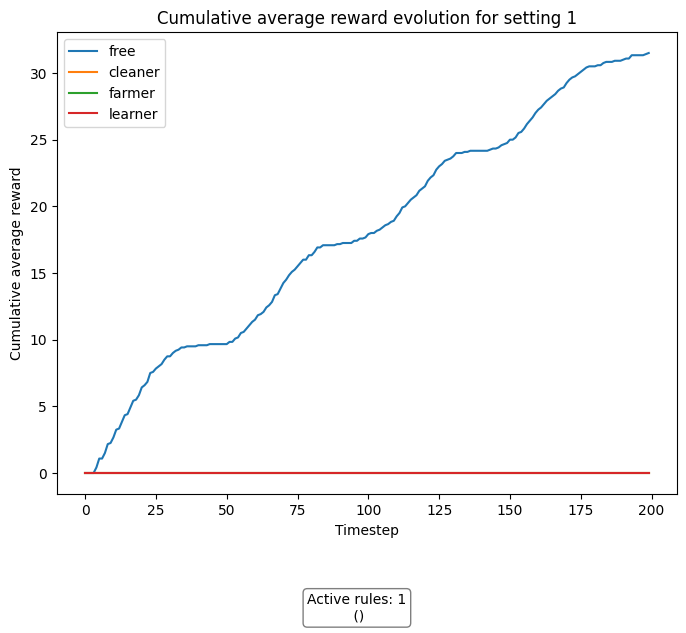

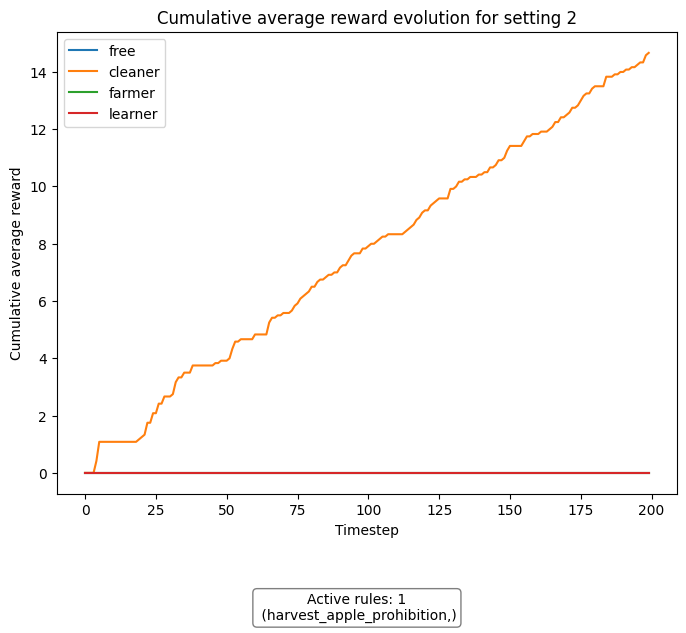

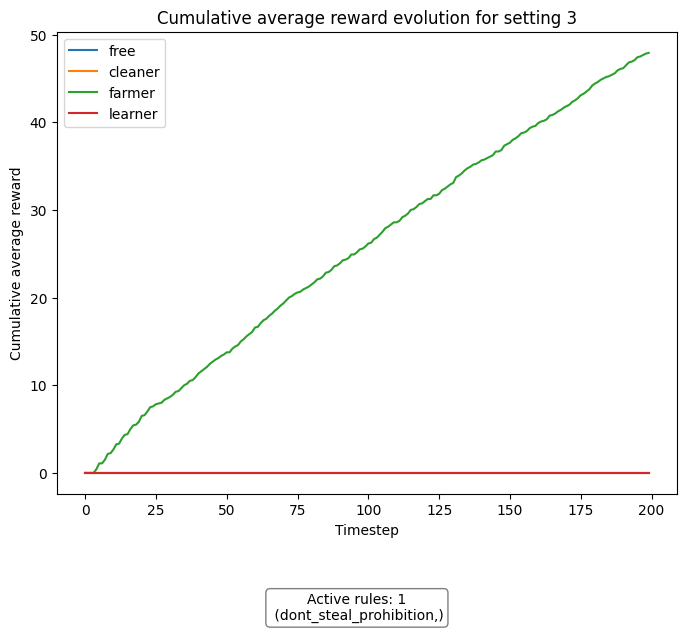

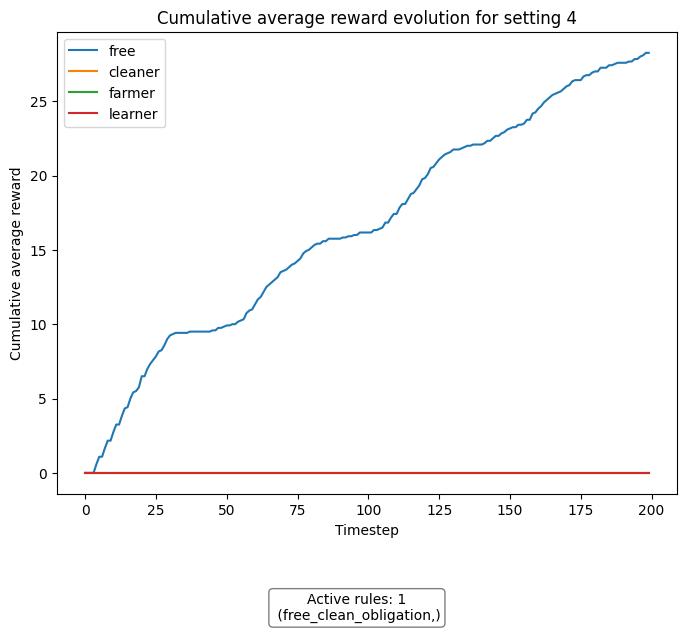

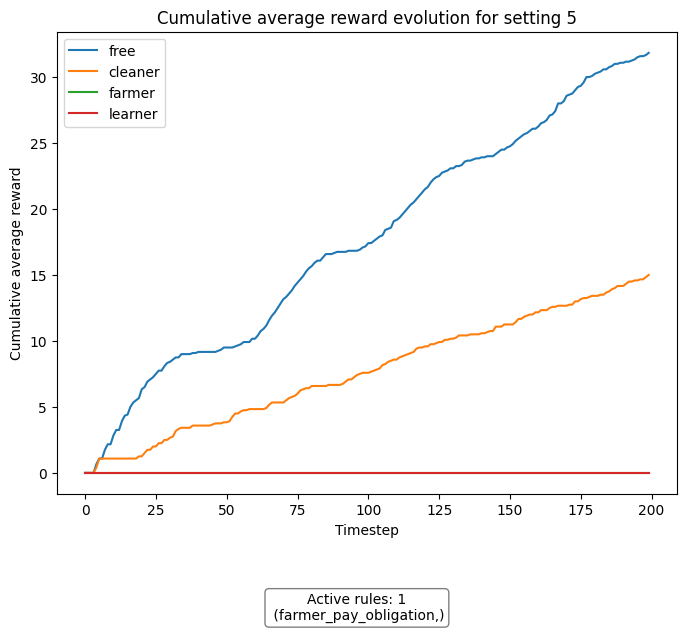

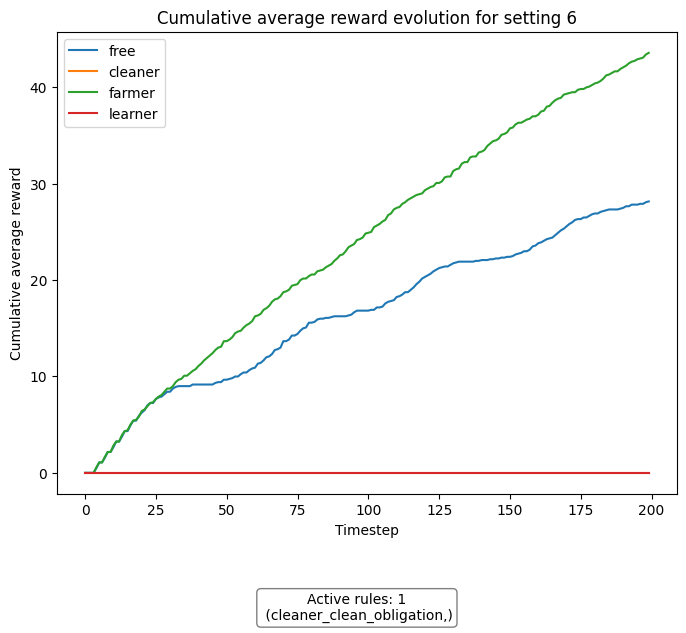

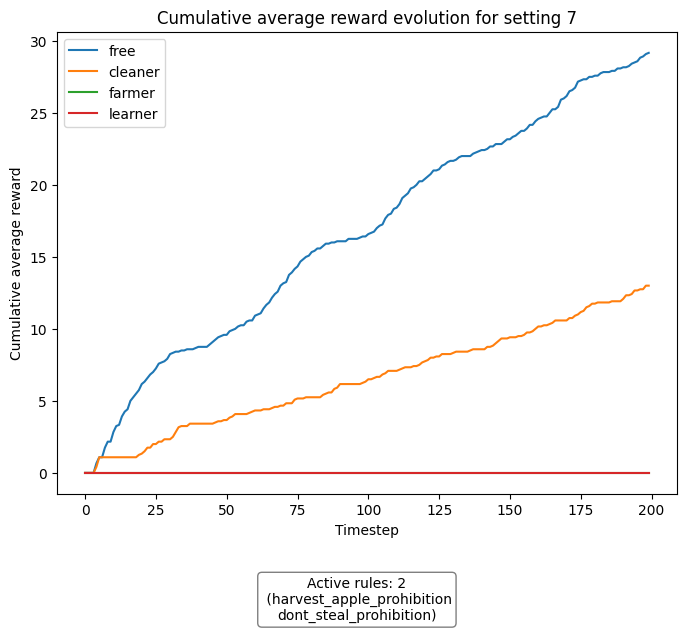

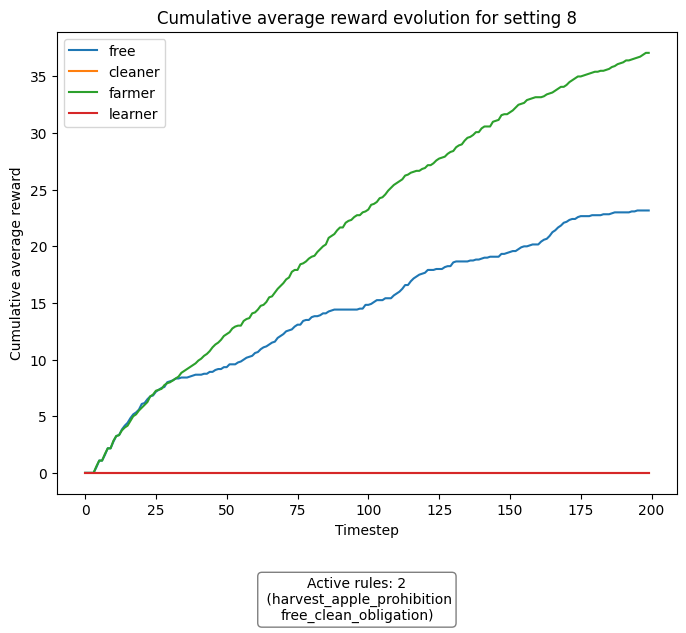

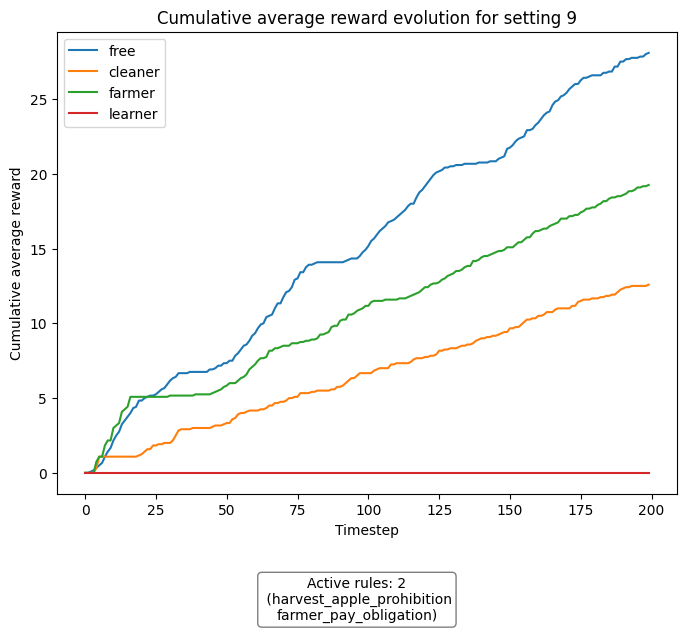

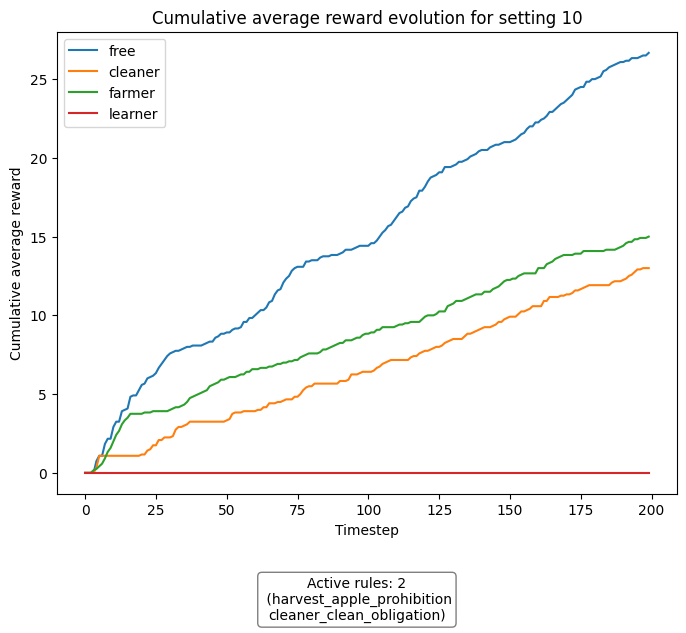

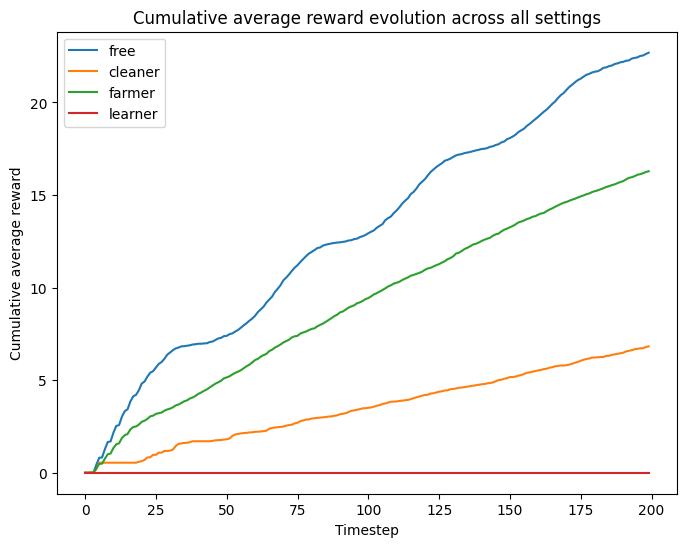

In [148]:
# data is stored in a list of 32 lists called `data_list`
averages = []
for i in range(10):
    fig, ax = plt.subplots(figsize=(8,6))
    mean_rewards = pd.DataFrame() # Initialize an empty DataFrame to store the mean rewards for the current setting
    for j in range(13):
        df = baseline_dfs[i][j] # Get the j-th dataframe for the i-th setting
        rewards = df.iloc[:, 1:5] # Get the first 4 columns (rewards per timestep)
        mean_rewards = mean_rewards.add(rewards, fill_value=0) # Add the rewards to the running sum in mean_rewards
    mean_rewards = mean_rewards.divide(12) # Divide the sum by the number of dataframes (8) to get the mean
    mean_rewards_cum = mean_rewards.cumsum() # Compute the cumulative mean rewards
    cur_rules = settings_names.iloc[i, 3].split(", ")
    rule_out = '\n'.join([str(elem) for elem in cur_rules])
    info_text = f"Active rules: {len(cur_rules)}\n {rule_out}"
    ax.text(0.5, -0.1, info_text, ha="center", transform=fig.transFigure, fontsize=10,
         bbox=dict(facecolor='white', alpha=0.5, boxstyle="round"))
    averages.append(mean_rewards) # Add the mean rewards to the list of averages for all settings
    ax.plot(mean_rewards_cum) # Plot the cumulative mean reward evolution for the current setting
    ax.set_title(f"Cumulative average reward evolution for setting {i+1}")
    ax.set_xlabel("Timestep")
    ax.set_ylabel("Cumulative average reward")
    ax.legend(labels=mean_rewards.columns) # Add a legend with the column names
    plt.show()
    
# Plot the average rewards across all settings
fig, ax = plt.subplots(figsize=(8,6))
average_rewards = pd.concat(averages).groupby(level=0).mean() # Concatenate all mean rewards and compute the average across all settings
average_rewards_cum = average_rewards.cumsum() # Compute the cumulative average rewards
ax.plot(average_rewards_cum) # Plot the cumulative average reward evolution for all settings
ax.set_title("Cumulative average reward evolution across all settings")
ax.set_xlabel("Timestep")
ax.set_ylabel("Cumulative average reward")
ax.legend(labels=average_rewards.columns) # Add a legend with the column names
plt.savefig('cum_rewards')
plt.show()

## 2. Test on active agents

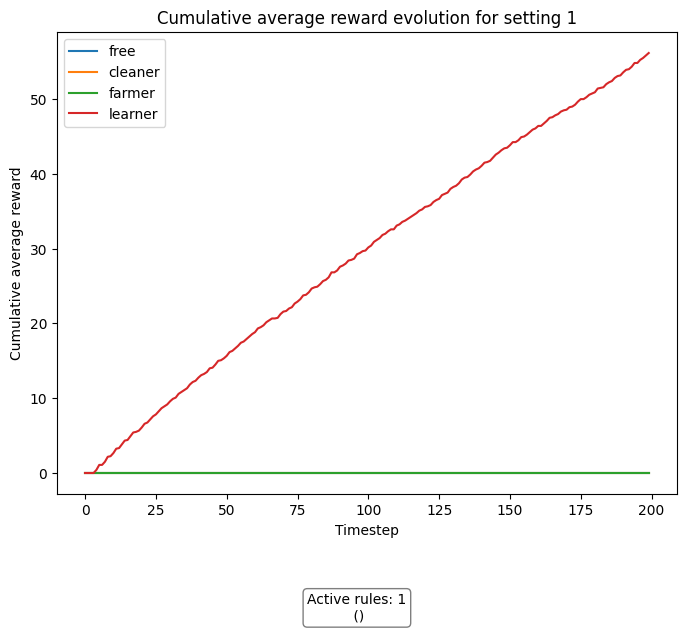

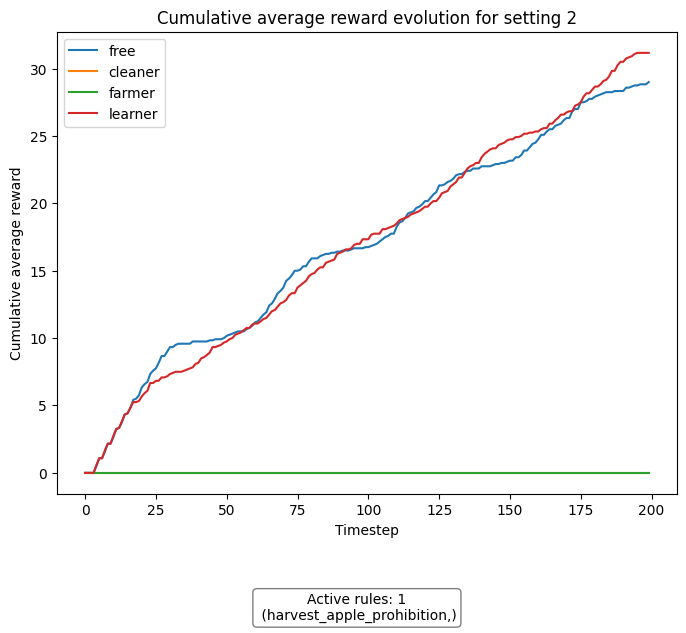

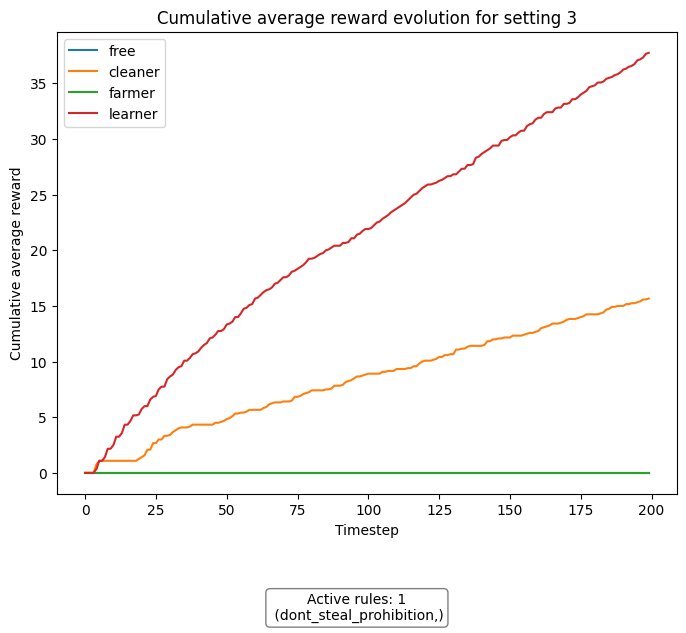

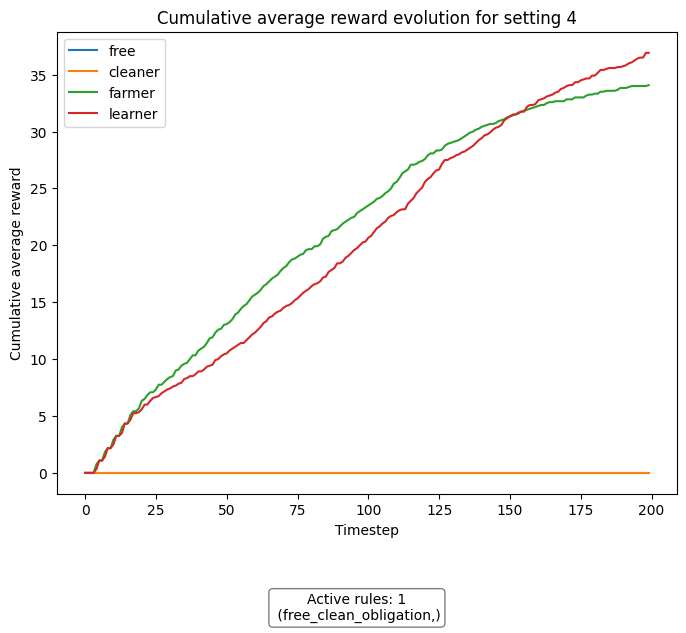

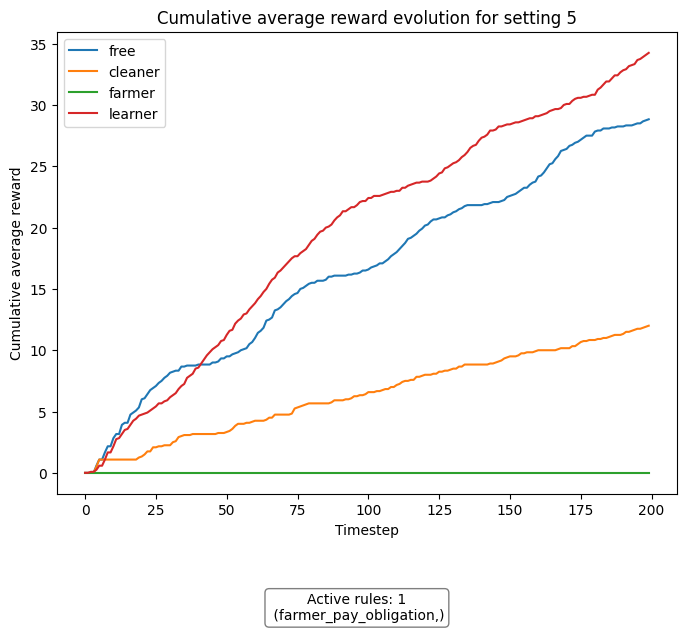

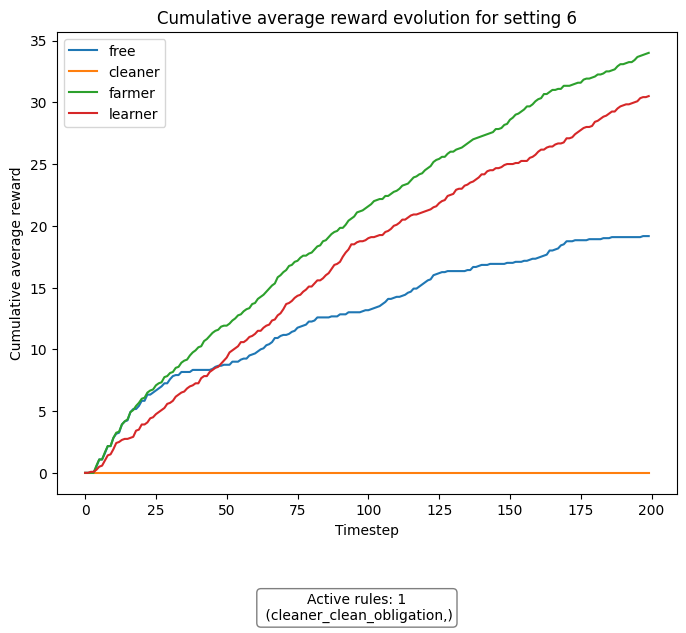

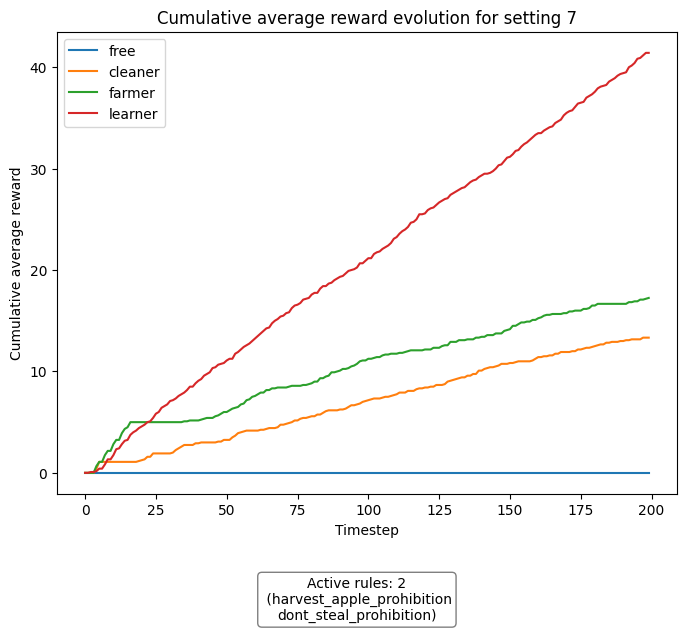

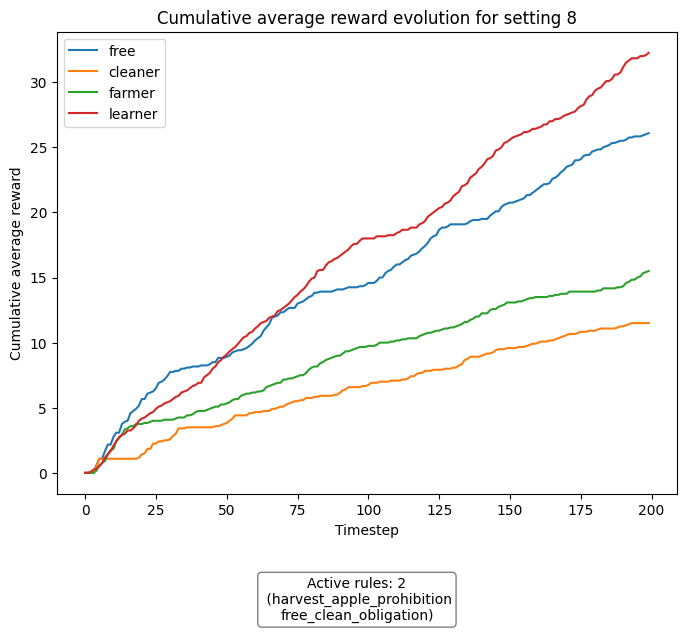

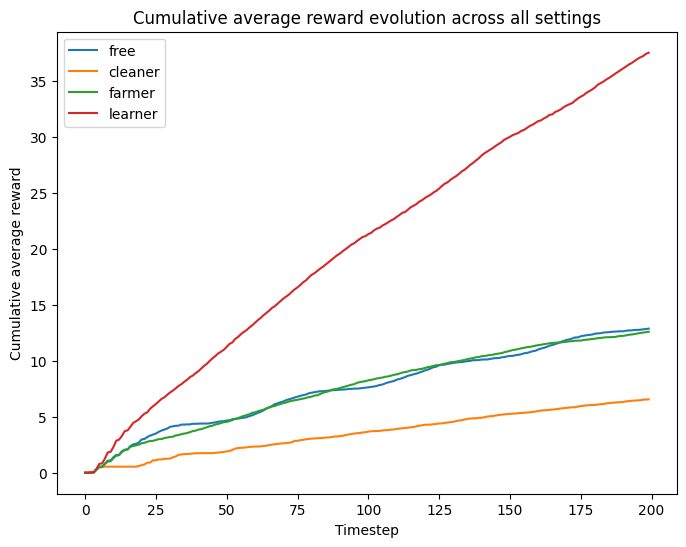

In [150]:
# data is stored in a list of 32 lists called `data_list`
averages = []
for i in range(8):
    fig, ax = plt.subplots(figsize=(8,6))
    mean_rewards = pd.DataFrame() # Initialize an empty DataFrame to store the mean rewards for the current setting
    for j in range(13):
        df = test_dfs[i][j] # Get the j-th dataframe for the i-th setting
        rewards = df.iloc[:, 1:5] # Get the first 4 columns (rewards per timestep)
        mean_rewards = mean_rewards.add(rewards, fill_value=0) # Add the rewards to the running sum in mean_rewards
    mean_rewards = mean_rewards.divide(12) # Divide the sum by the number of dataframes (8) to get the mean
    mean_rewards_cum = mean_rewards.cumsum() # Compute the cumulative mean rewards
    cur_rules = settings_names.iloc[i, 3].split(", ")
    rule_out = '\n'.join([str(elem) for elem in cur_rules])
    info_text = f"Active rules: {len(cur_rules)}\n {rule_out}"
    ax.text(0.5, -0.1, info_text, ha="center", transform=fig.transFigure, fontsize=10,
         bbox=dict(facecolor='white', alpha=0.5, boxstyle="round"))
    averages.append(mean_rewards) # Add the mean rewards to the list of averages for all settings
    ax.plot(mean_rewards_cum) # Plot the cumulative mean reward evolution for the current setting
    ax.set_title(f"Cumulative average reward evolution for setting {i+1}")
    ax.set_xlabel("Timestep")
    ax.set_ylabel("Cumulative average reward")
    ax.legend(labels=mean_rewards.columns) # Add a legend with the column names
    plt.show()
    
# Plot the average rewards across all settings
fig, ax = plt.subplots(figsize=(8,6))
average_rewards = pd.concat(averages).groupby(level=0).mean() # Concatenate all mean rewards and compute the average across all settings
average_rewards_cum = average_rewards.cumsum() # Compute the cumulative average rewards
ax.plot(average_rewards_cum) # Plot the cumulative average reward evolution for all settings
ax.set_title("Cumulative average reward evolution across all settings")
ax.set_xlabel("Timestep")
ax.set_ylabel("Cumulative average reward")
ax.legend(labels=average_rewards.columns) # Add a legend with the column names
plt.savefig('cum_rewards')
plt.show()

## 2. Test on Rule Sets

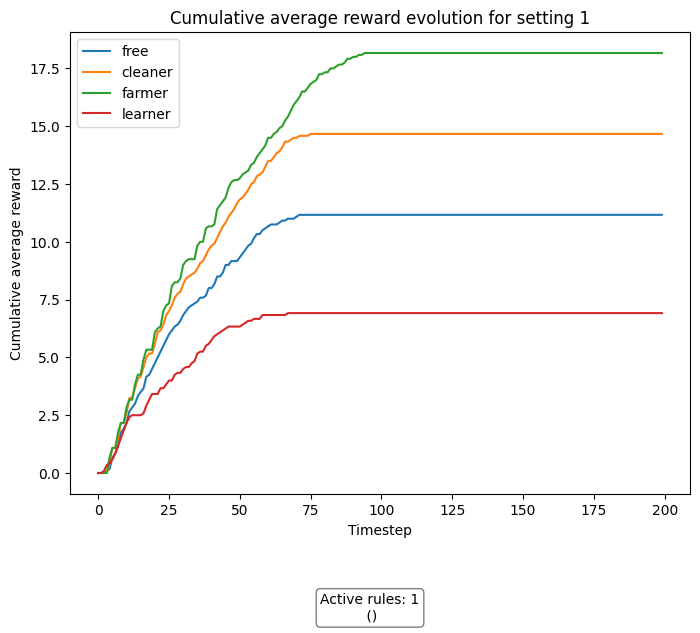

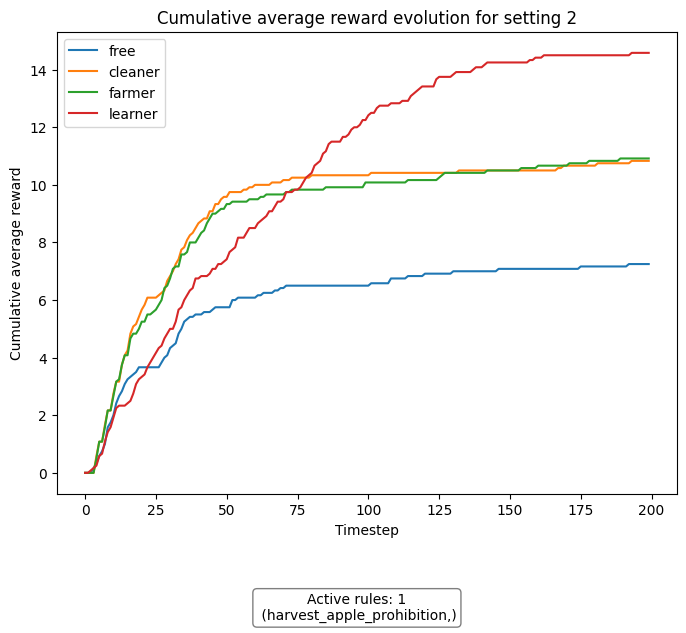

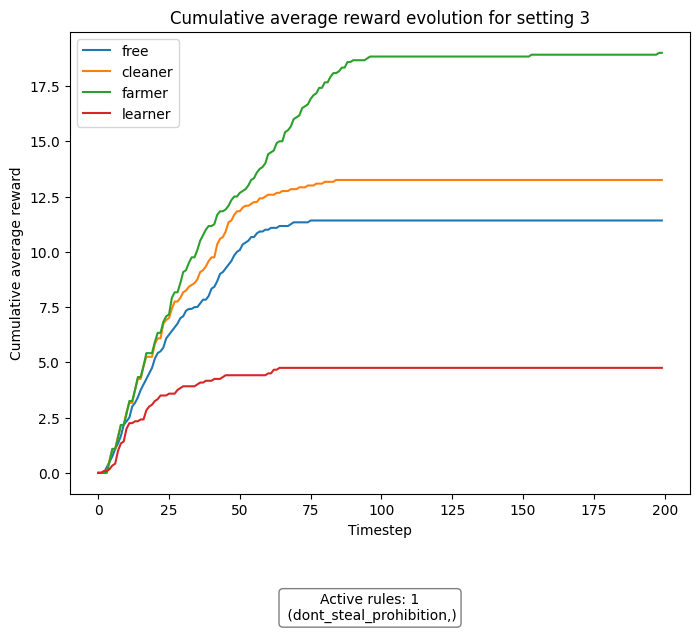

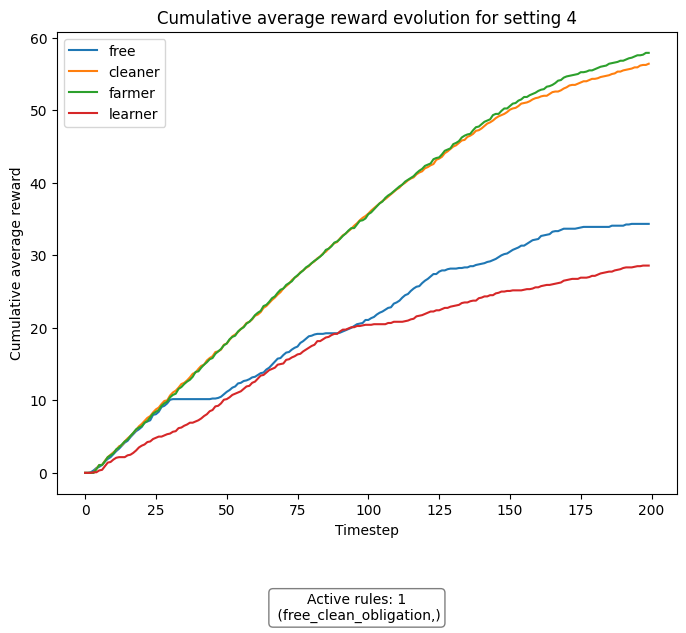

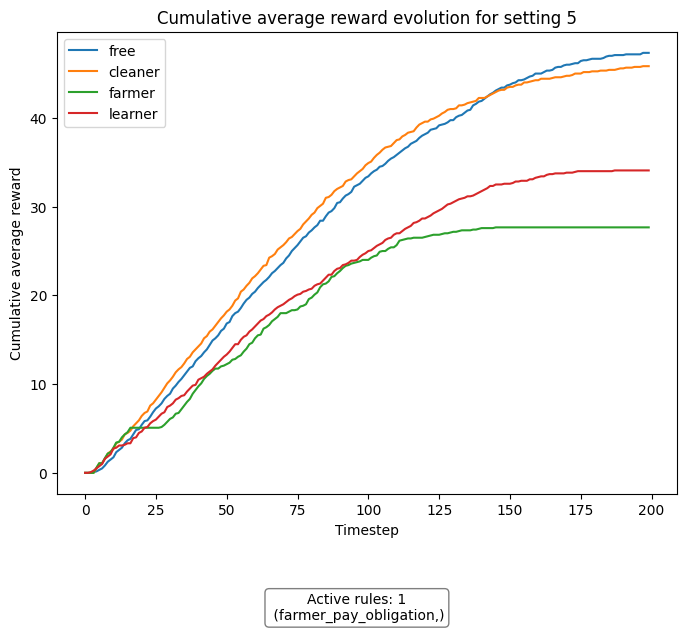

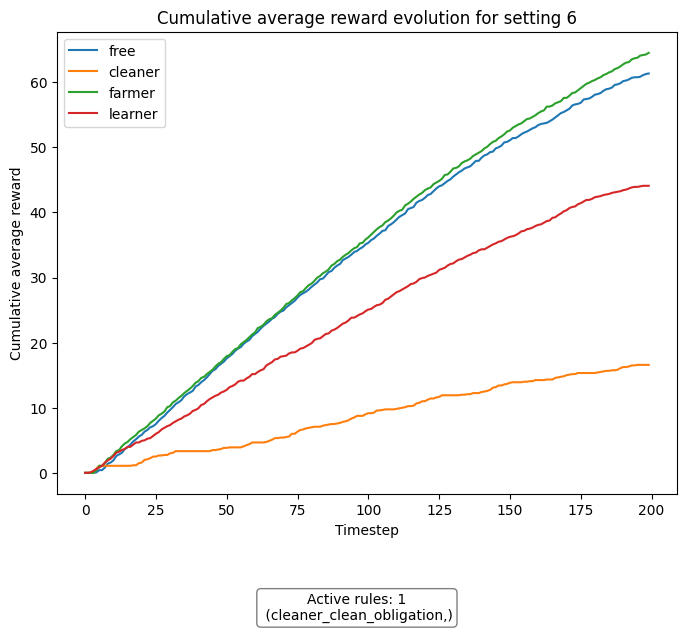

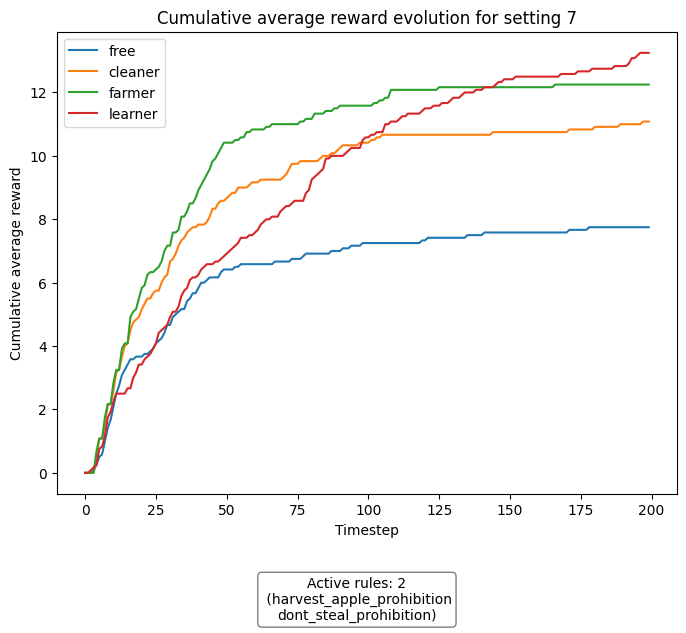

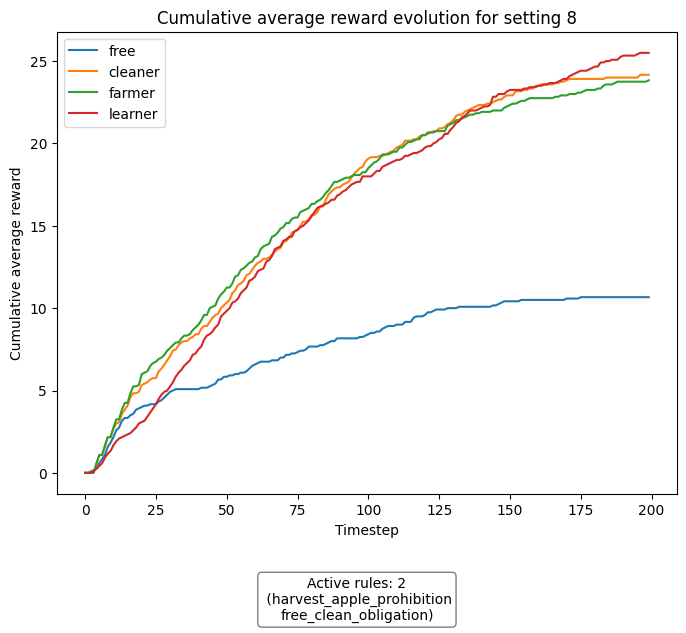

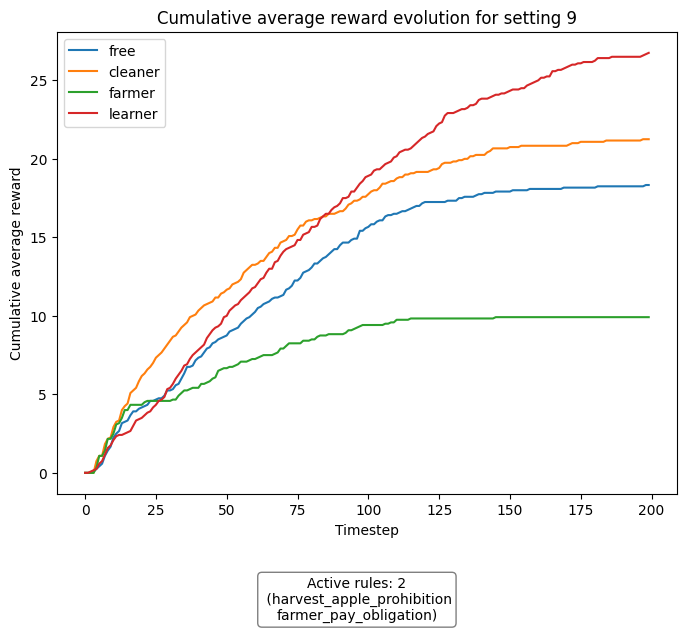

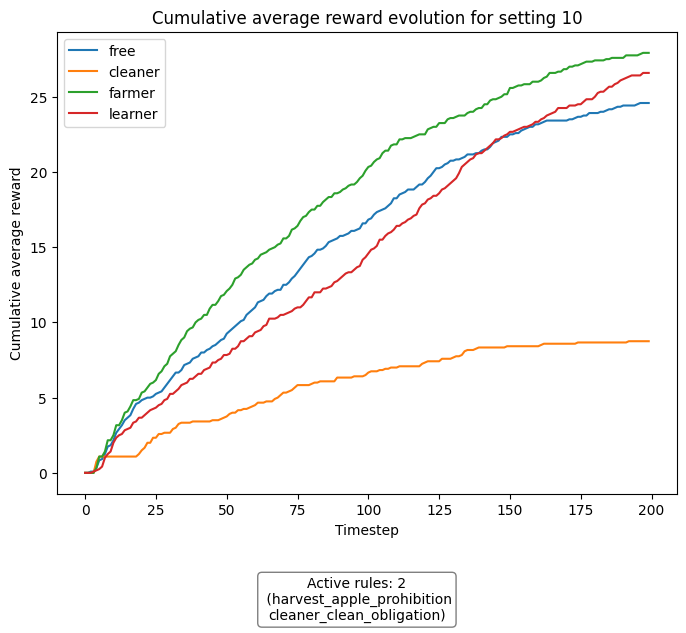

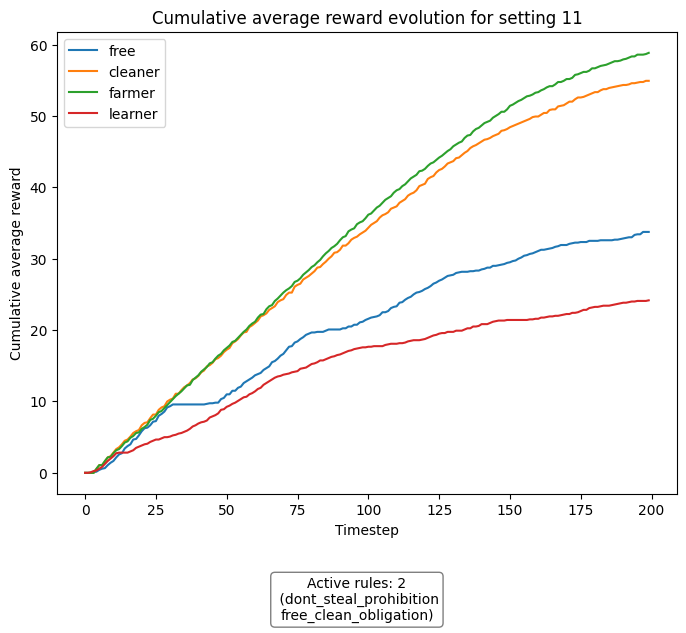

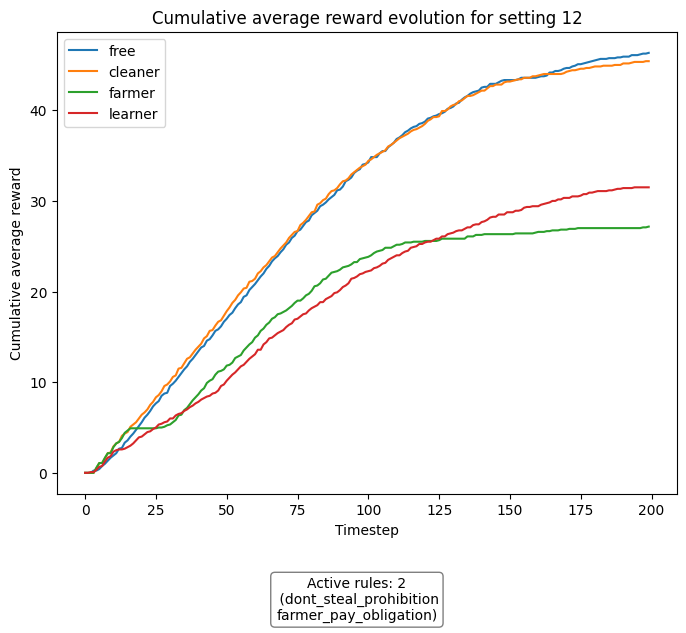

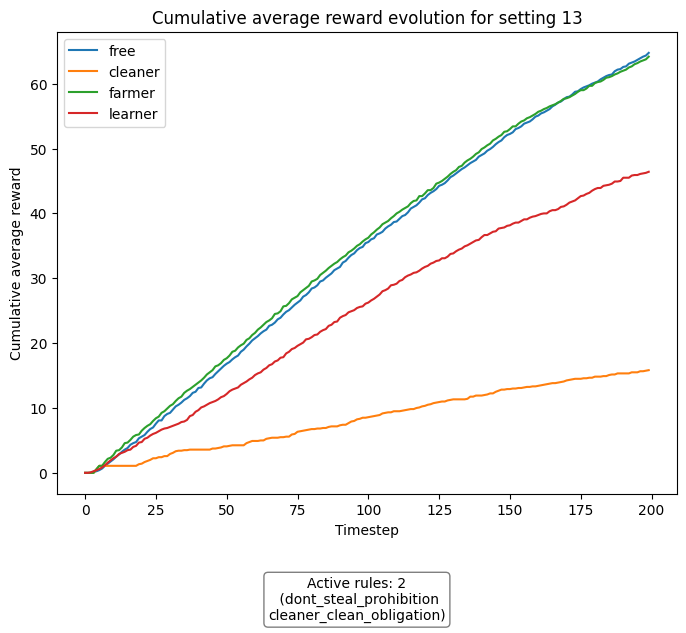

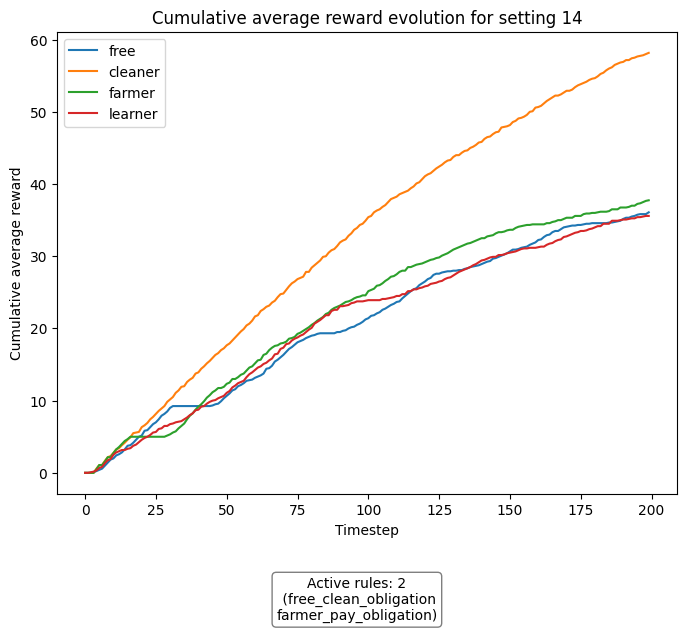

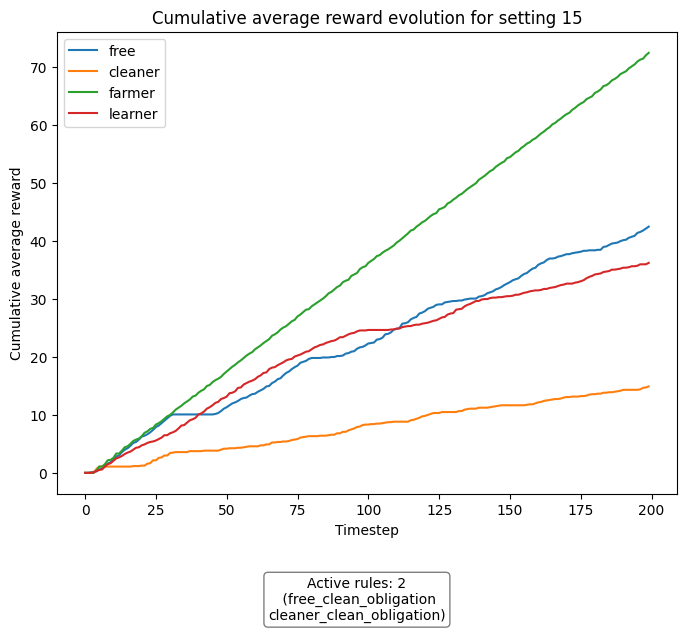

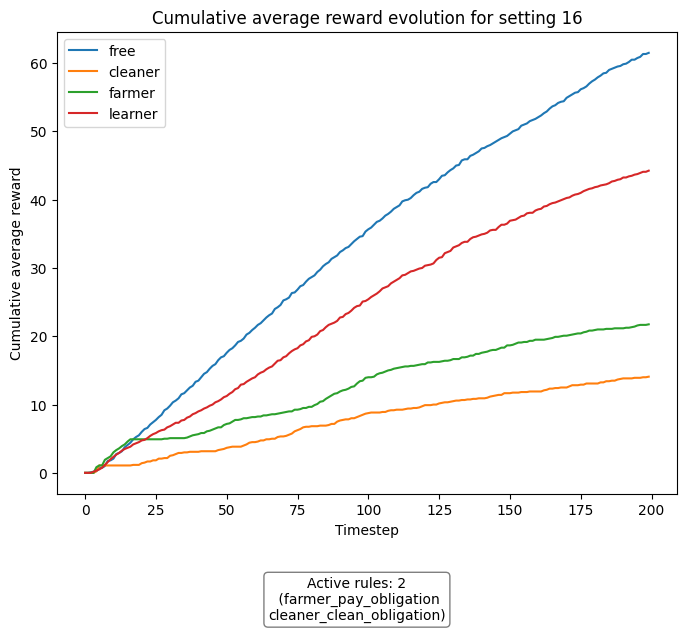

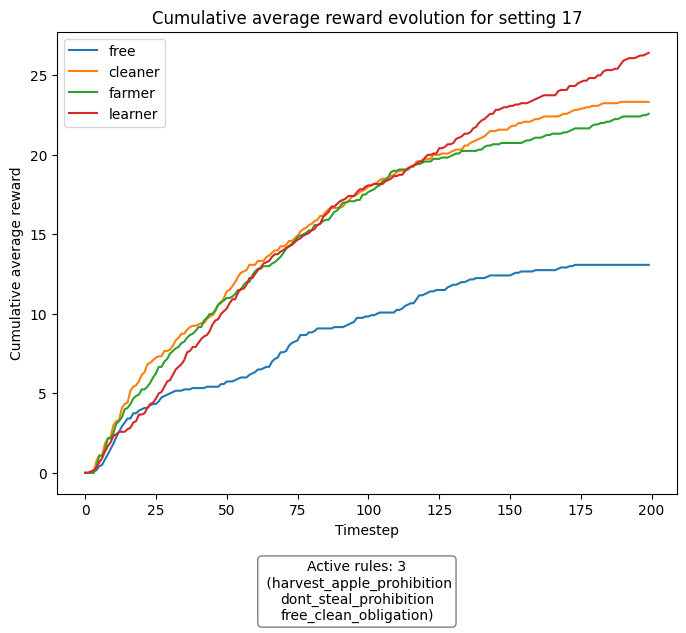

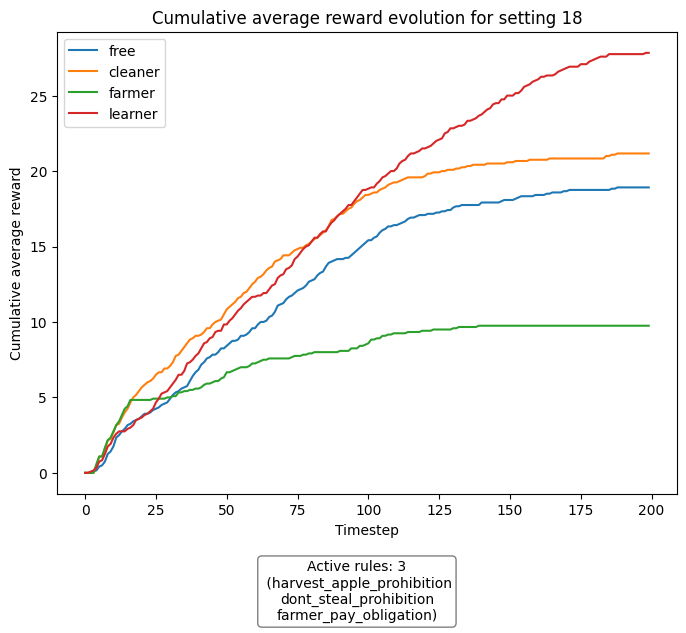

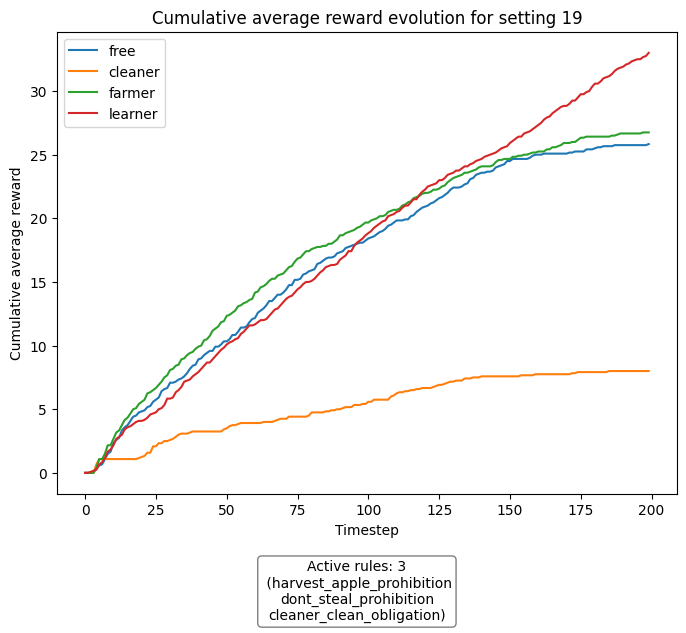

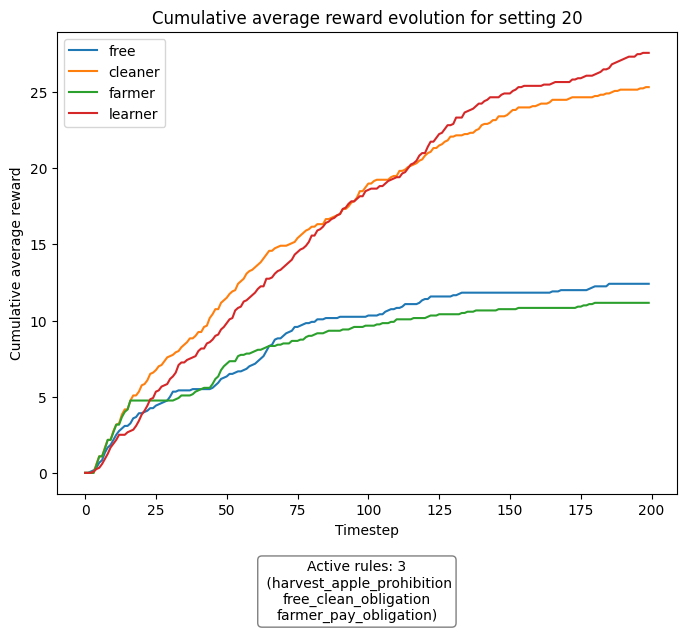

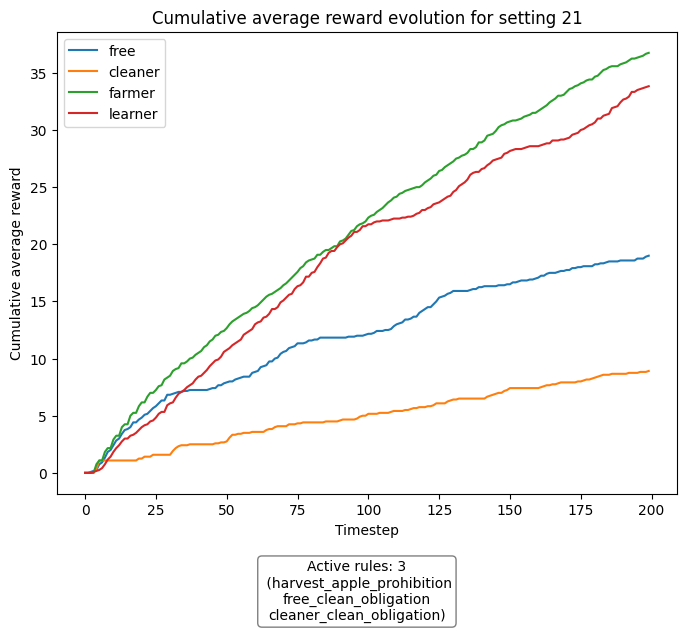

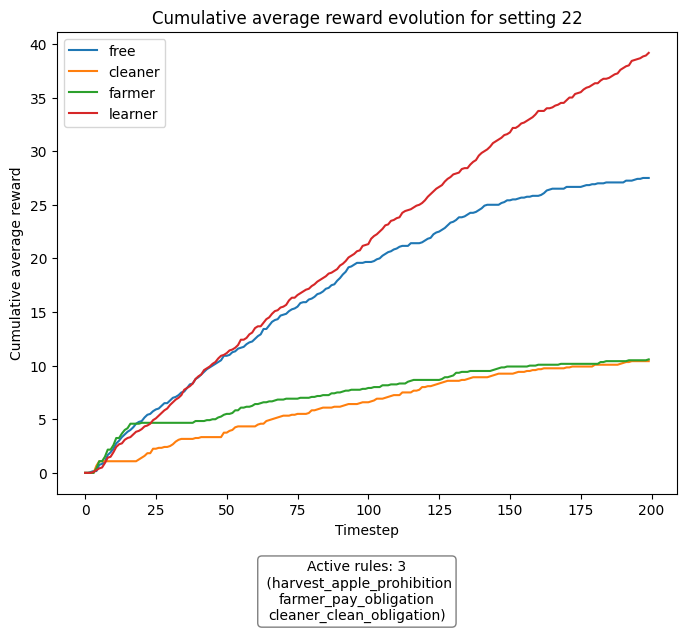

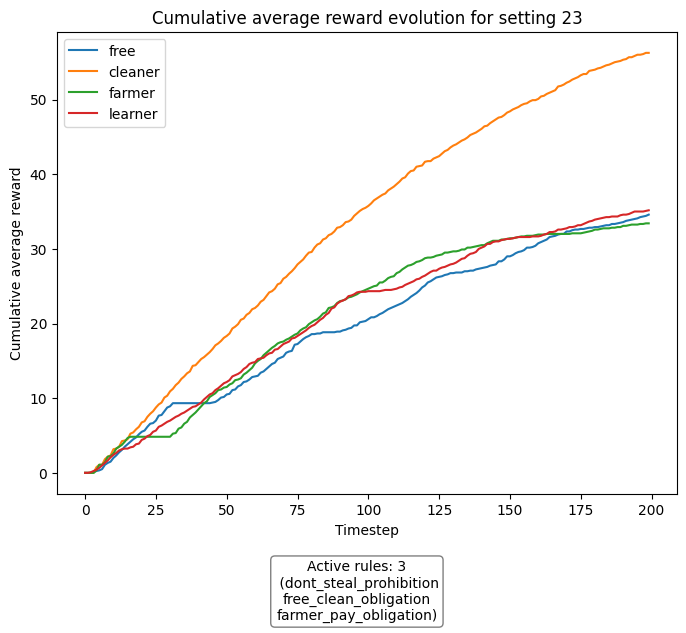

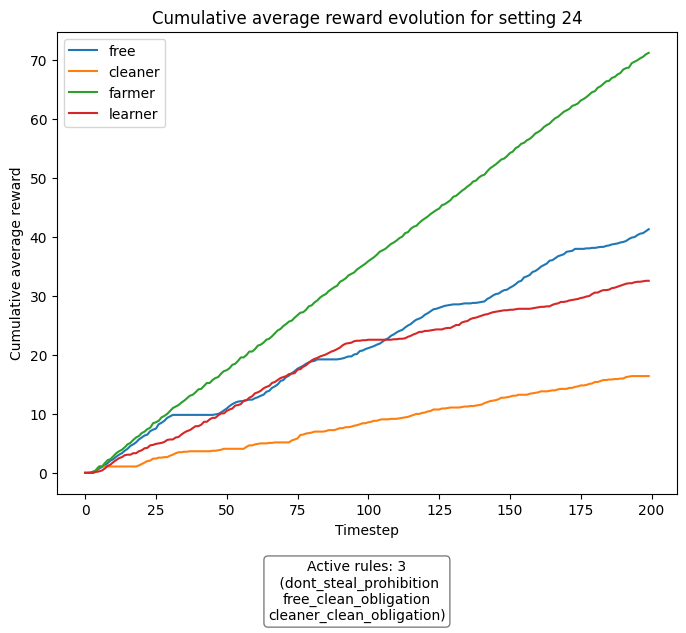

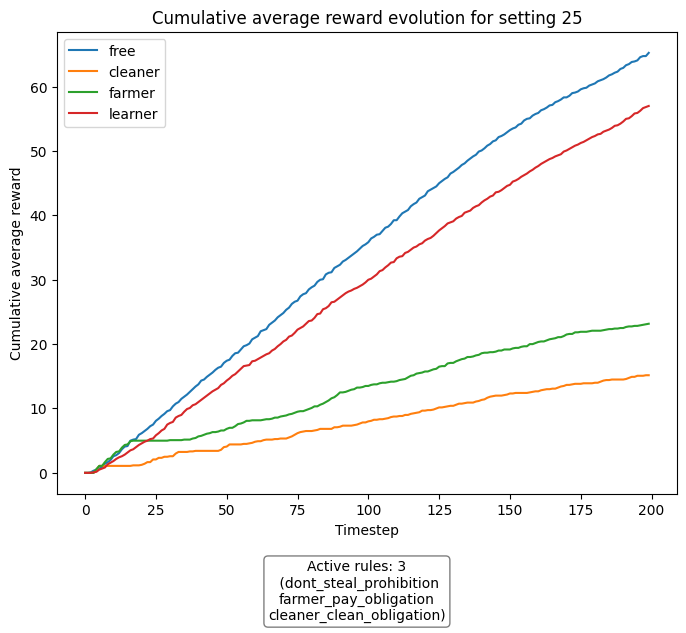

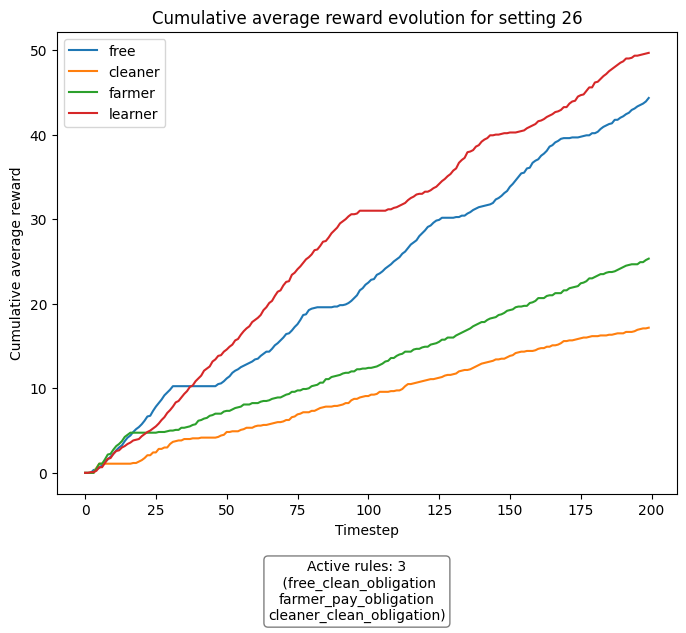

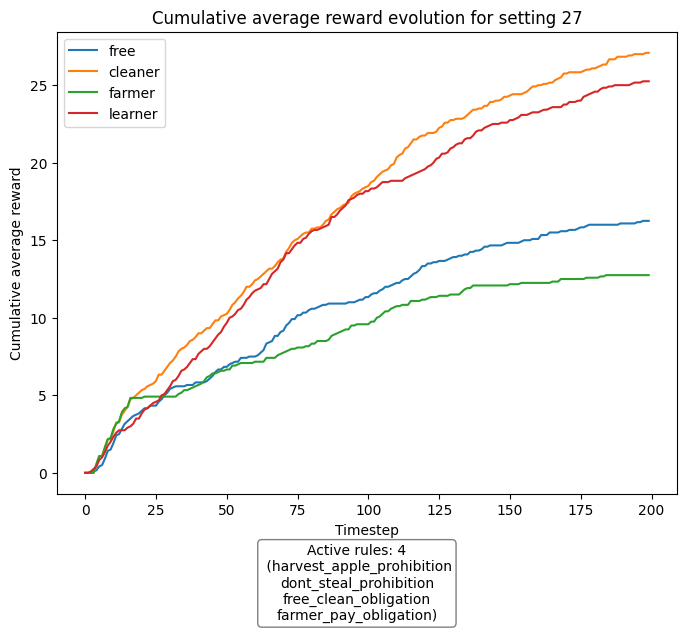

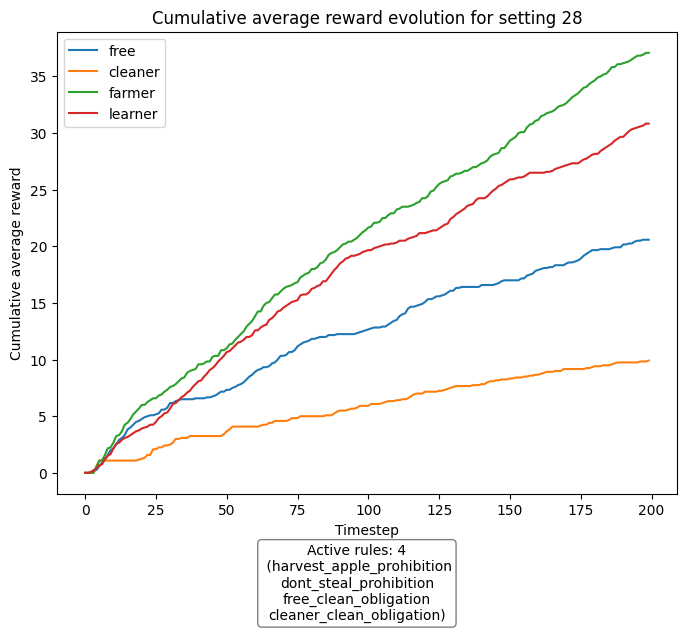

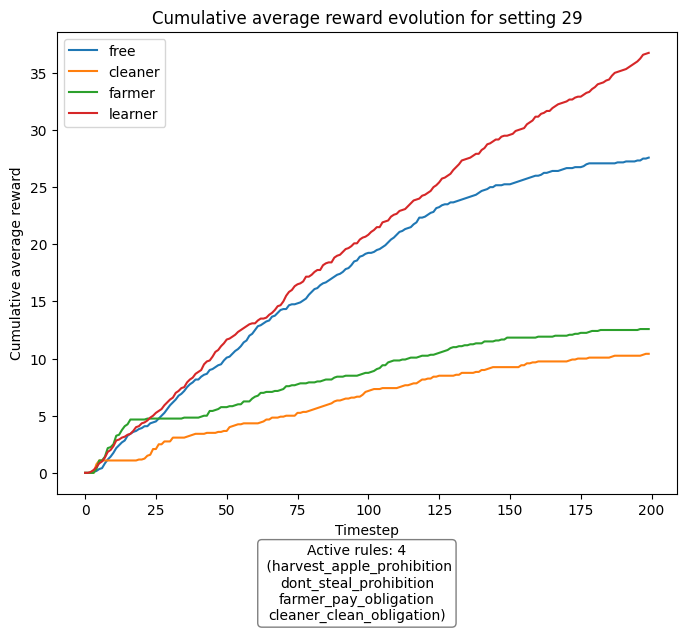

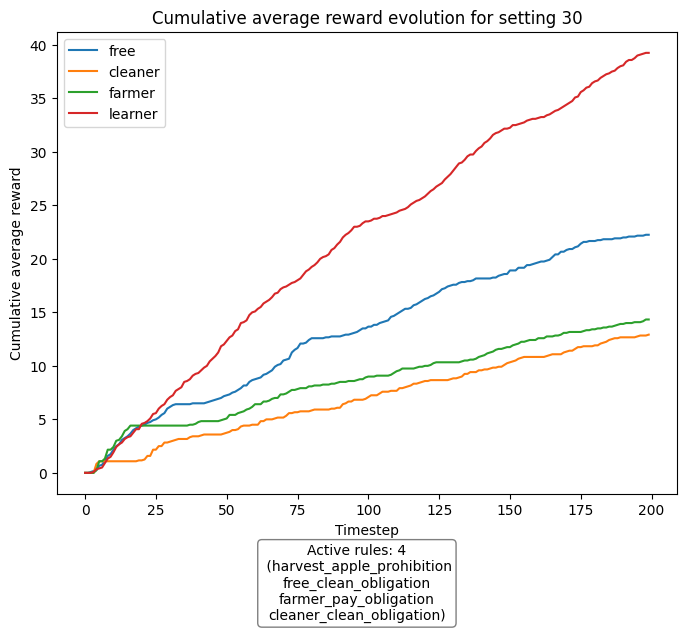

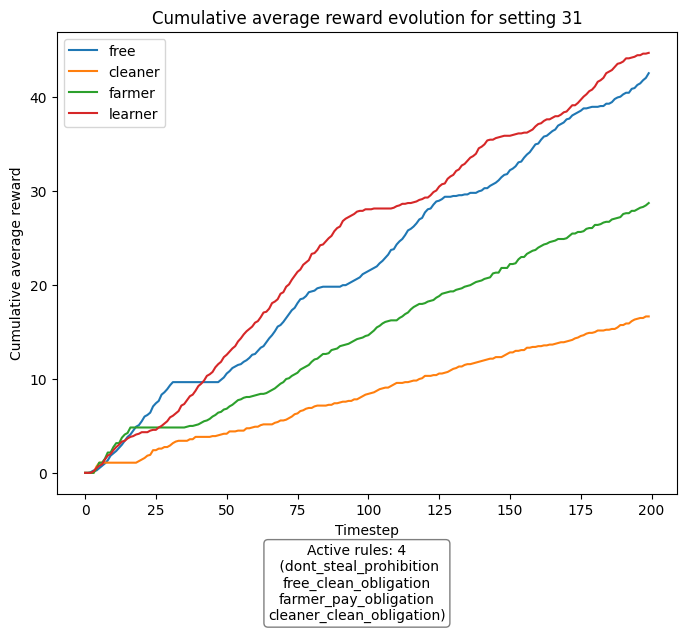

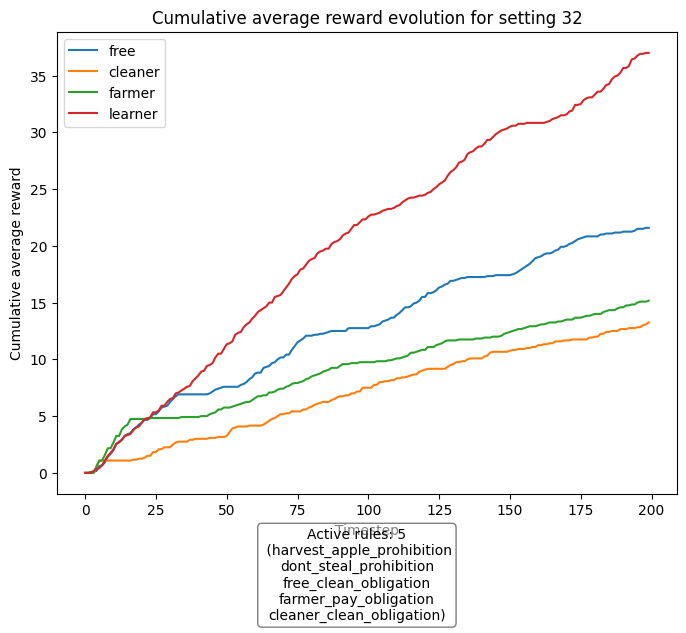

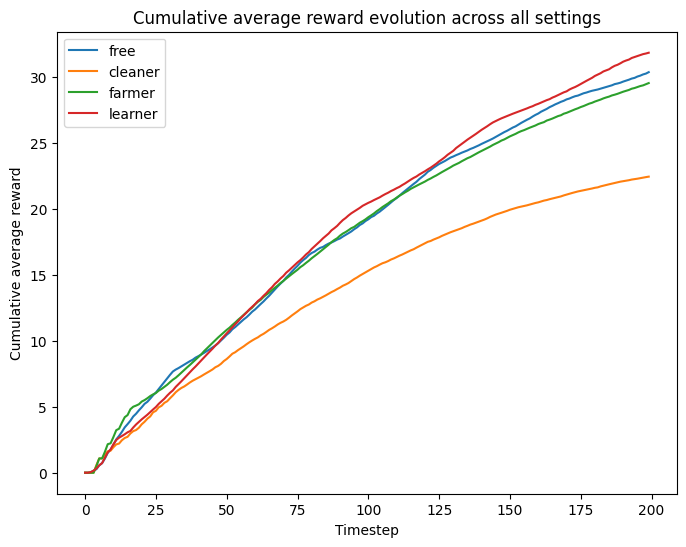

In [144]:
# data is stored in a list of 32 lists called `data_list`
averages = []
for i in range(32):
    fig, ax = plt.subplots(figsize=(8,6))
    mean_rewards = pd.DataFrame() # Initialize an empty DataFrame to store the mean rewards for the current setting
    for j in range(13):
        df = rules_dfs[i][j] # Get the j-th dataframe for the i-th setting
        rewards = df.iloc[:, 1:5] # Get the first 4 columns (rewards per timestep)
        mean_rewards = mean_rewards.add(rewards, fill_value=0) # Add the rewards to the running sum in mean_rewards
    mean_rewards = mean_rewards.divide(12) # Divide the sum by the number of dataframes (8) to get the mean
    mean_rewards_cum = mean_rewards.cumsum() # Compute the cumulative mean rewards
    cur_rules = settings_names.iloc[i, 3].split(", ")
    rule_out = '\n'.join([str(elem) for elem in cur_rules])
    info_text = f"Active rules: {len(cur_rules)}\n {rule_out}"
    ax.text(0.5, -0.1, info_text, ha="center", transform=fig.transFigure, fontsize=10,
         bbox=dict(facecolor='white', alpha=0.5, boxstyle="round"))
    averages.append(mean_rewards) # Add the mean rewards to the list of averages for all settings
    ax.plot(mean_rewards_cum) # Plot the cumulative mean reward evolution for the current setting
    ax.set_title(f"Cumulative average reward evolution for setting {i+1}")
    ax.set_xlabel("Timestep")
    ax.set_ylabel("Cumulative average reward")
    ax.legend(labels=mean_rewards.columns) # Add a legend with the column names
    plt.show()
    
# Plot the average rewards across all settings
fig, ax = plt.subplots(figsize=(8,6))
average_rewards = pd.concat(averages).groupby(level=0).mean() # Concatenate all mean rewards and compute the average across all settings
average_rewards_cum = average_rewards.cumsum() # Compute the cumulative average rewards
ax.plot(average_rewards_cum) # Plot the cumulative average reward evolution for all settings
ax.set_title("Cumulative average reward evolution across all settings")
ax.set_xlabel("Timestep")
ax.set_ylabel("Cumulative average reward")
ax.legend(labels=average_rewards.columns) # Add a legend with the column names
plt.savefig('cum_rewards')
plt.show()

# Learned Rules

## 1. Test on Roles

/var/folders/4v/9klk9mnx3590cr7wzzyykff00000gn/T/ipykernel_63623/3956211095.py:71: RuntimeWarning: Mean of empty slice
  mean_timesteps = np.nanmean(setting_timesteps, axis=0)
/opt/homebrew/lib/python3.10/site-packages/matplotlib/axes/_base.py:2532: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


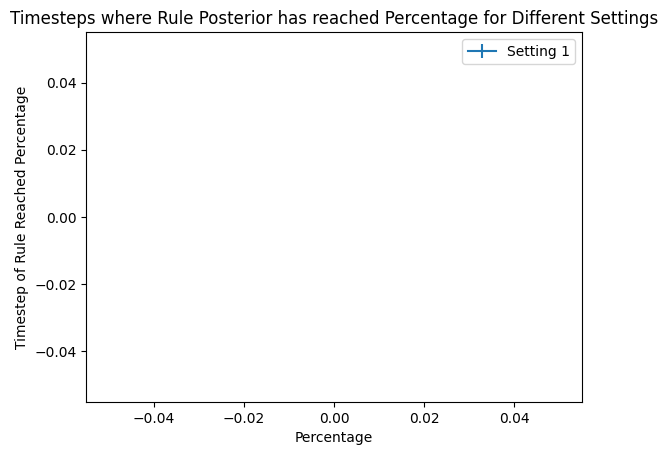

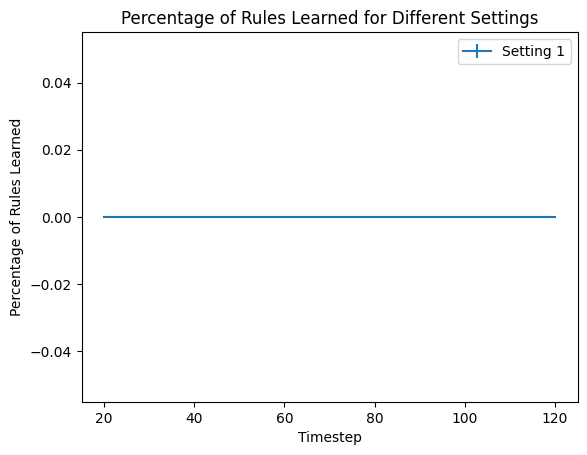

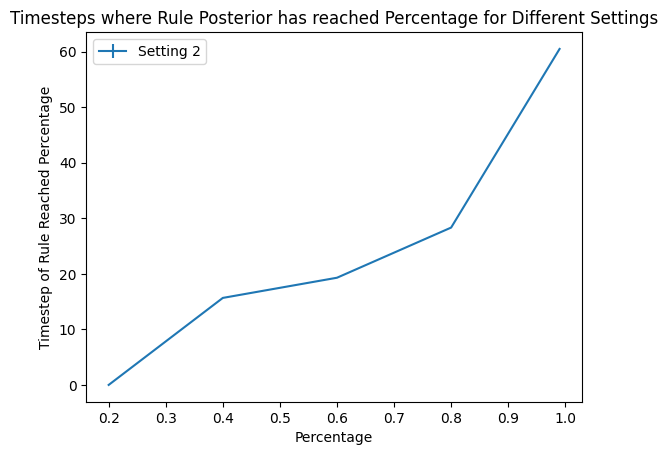

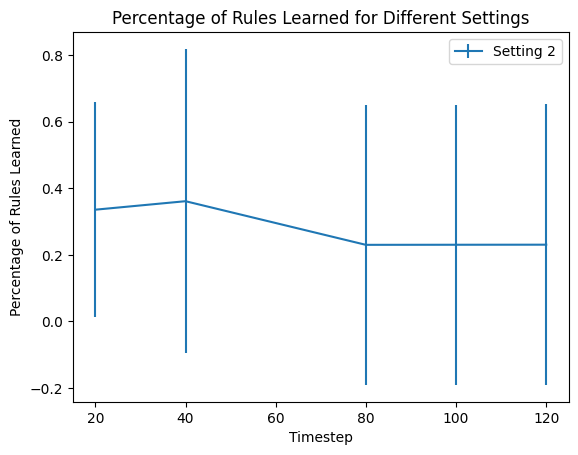

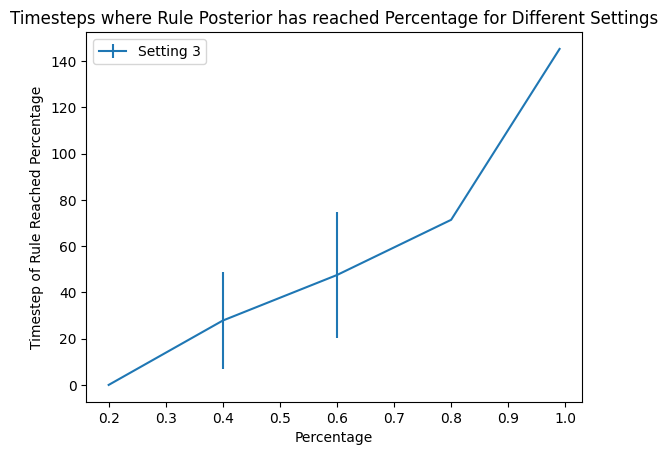

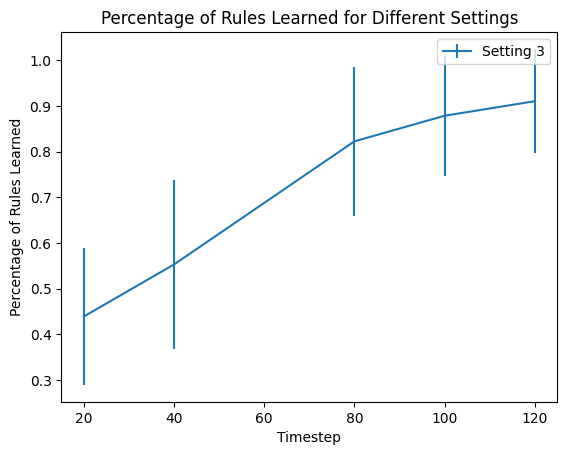

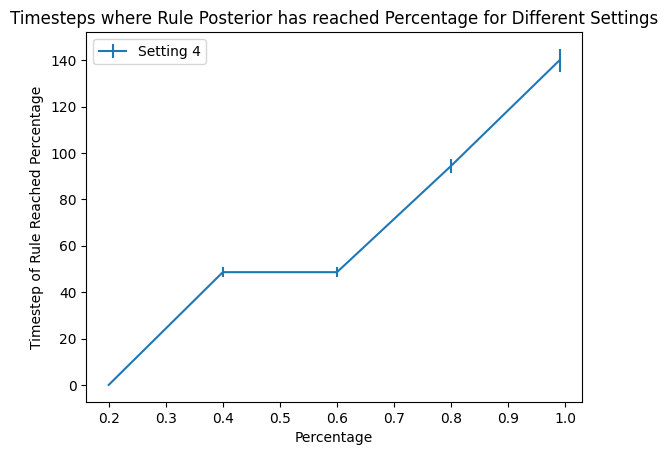

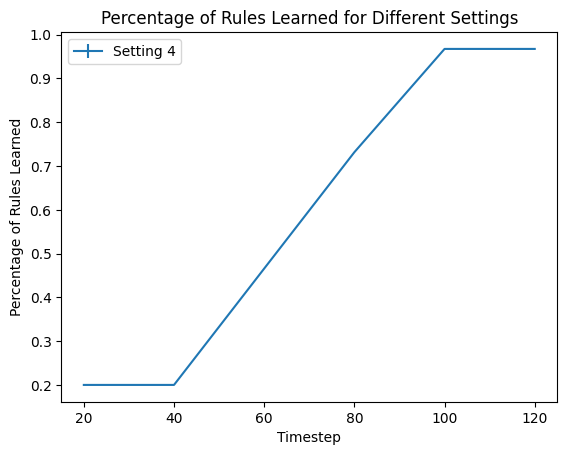

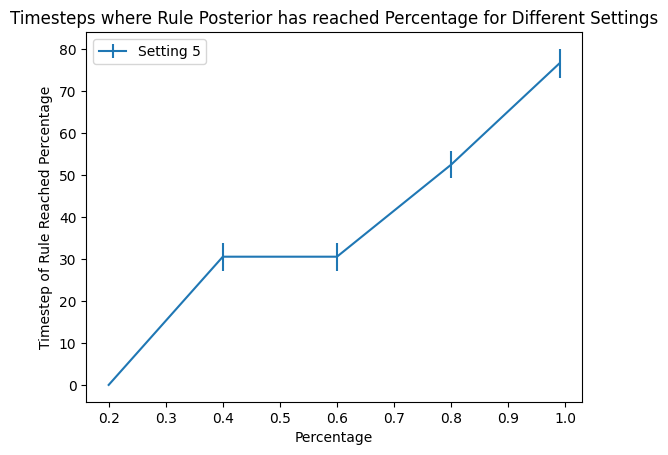

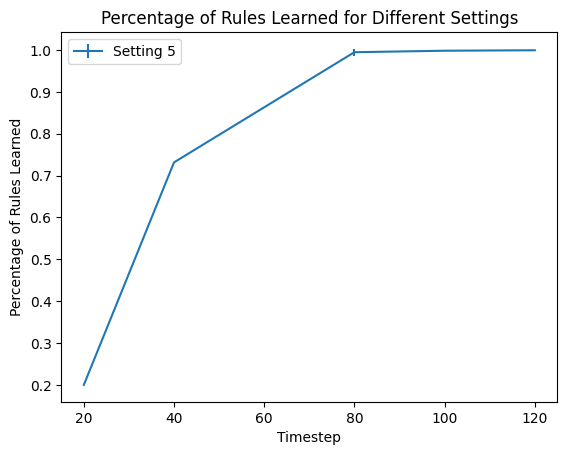

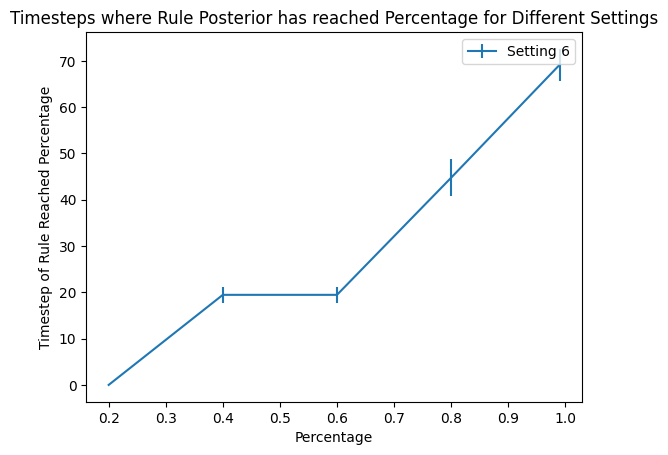

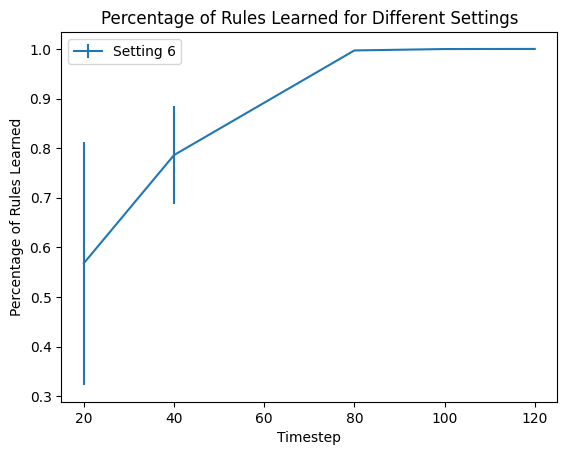

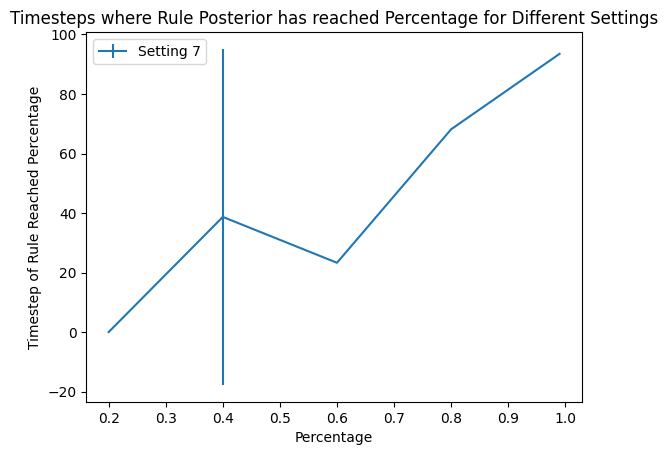

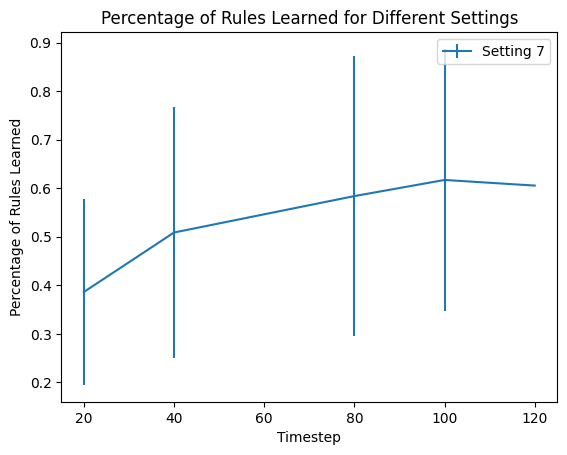

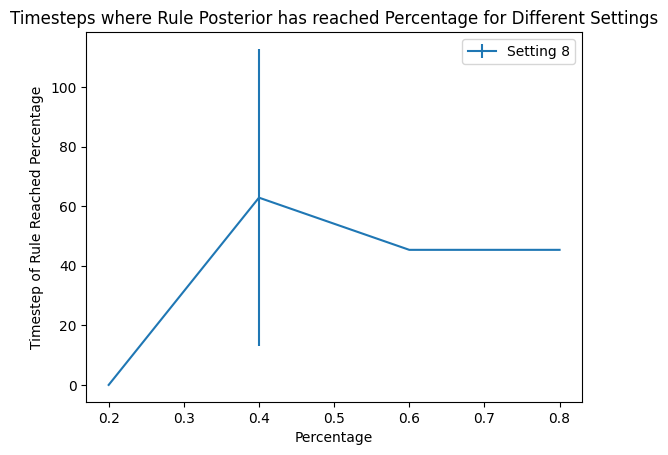

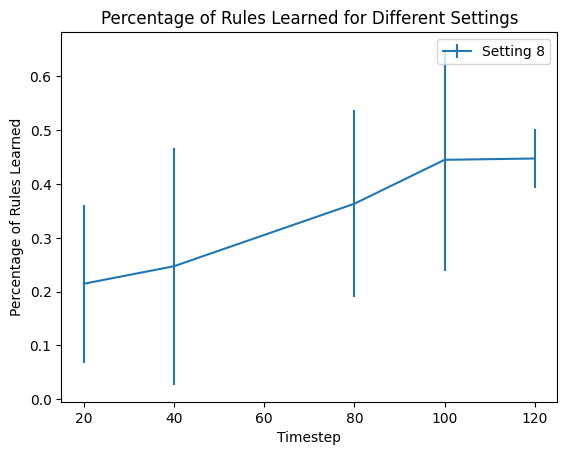

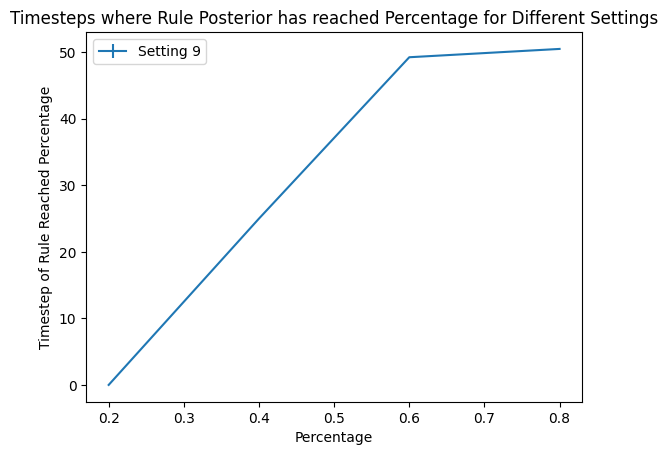

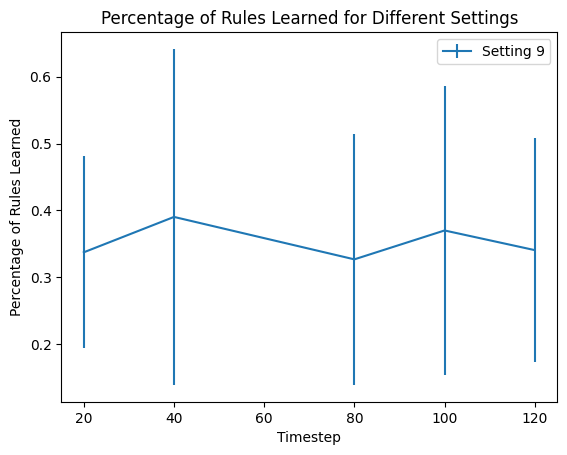

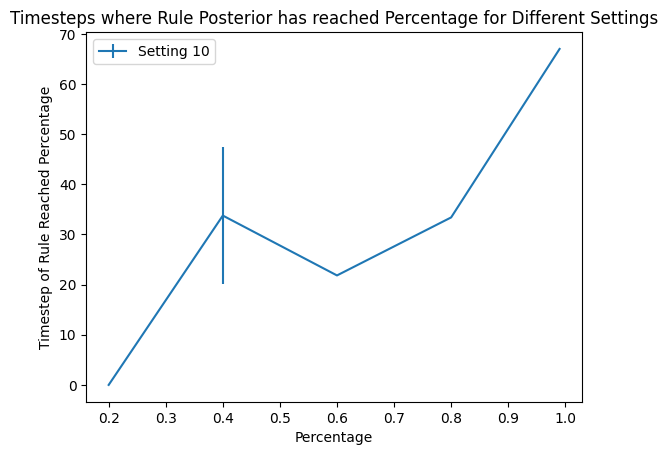

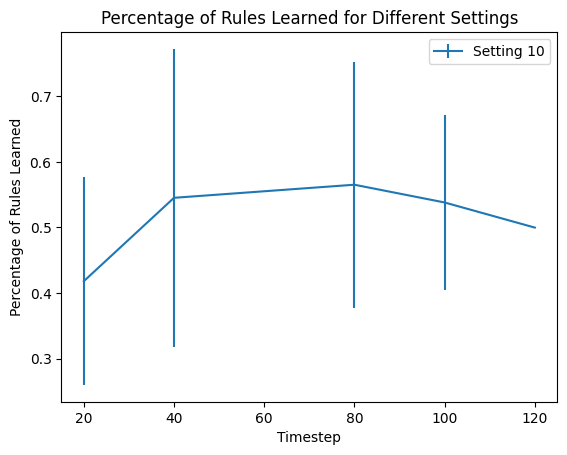

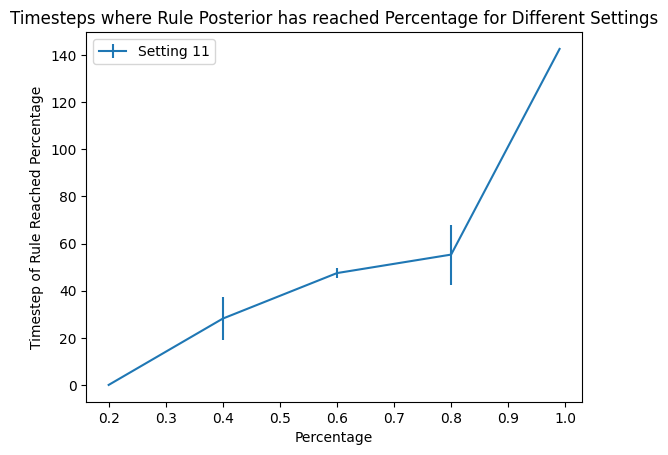

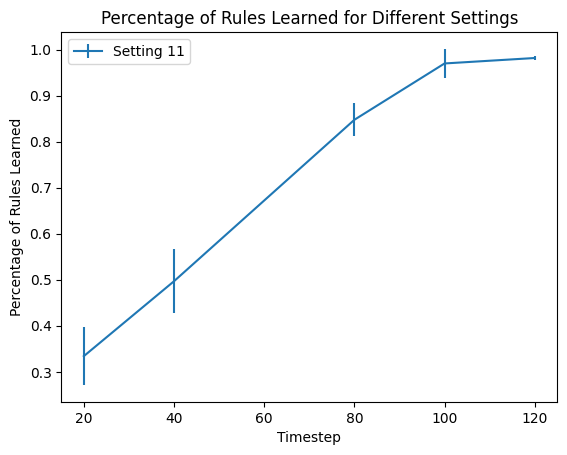

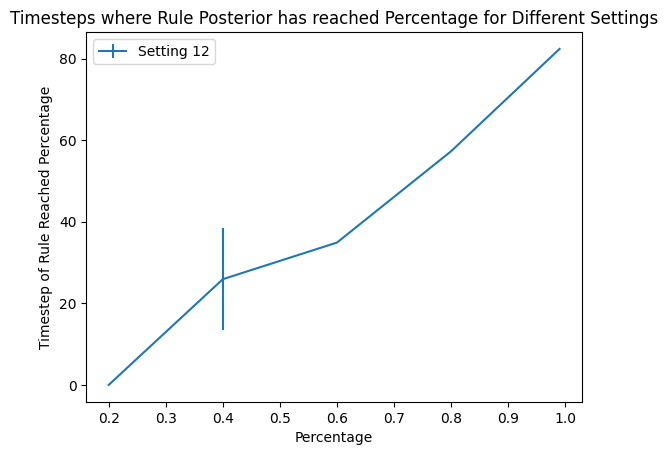

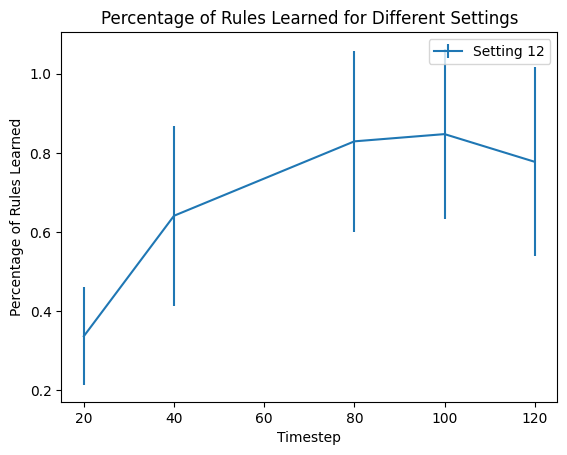

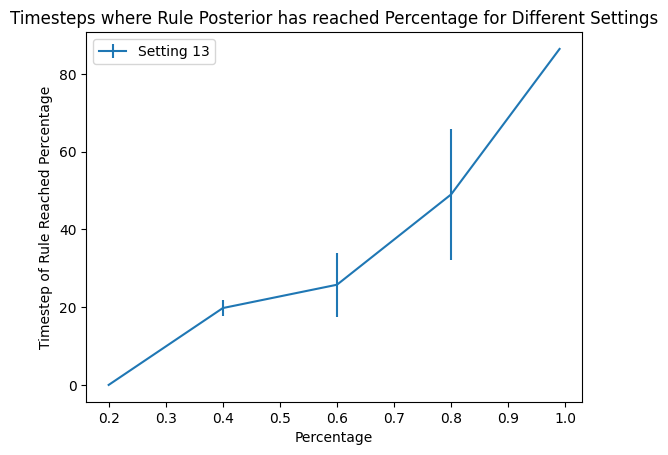

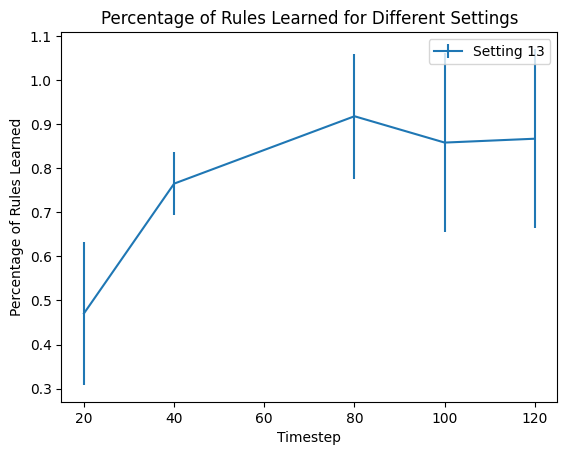

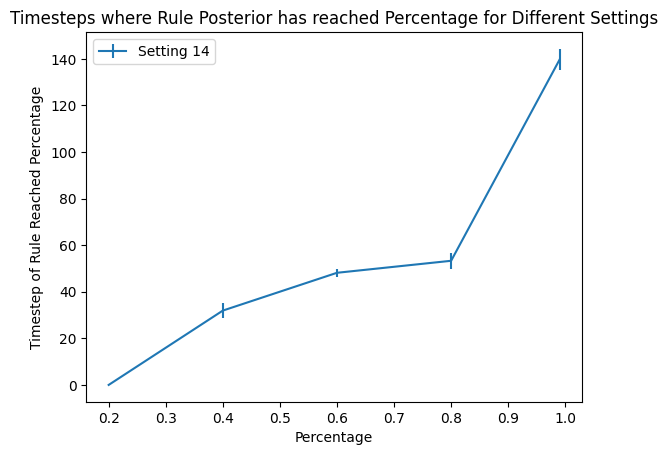

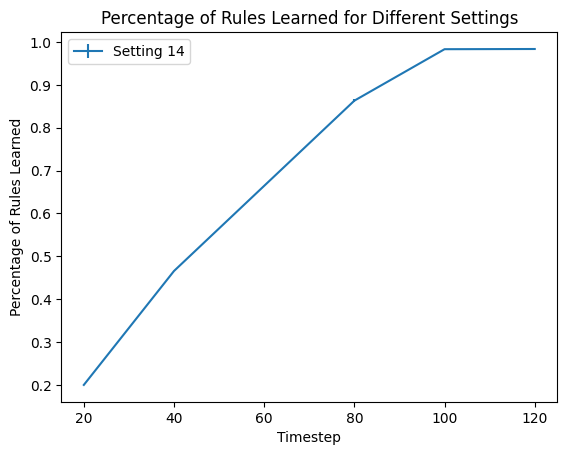

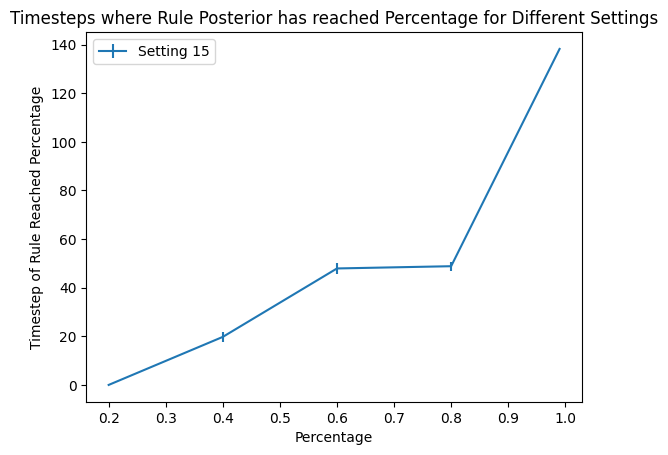

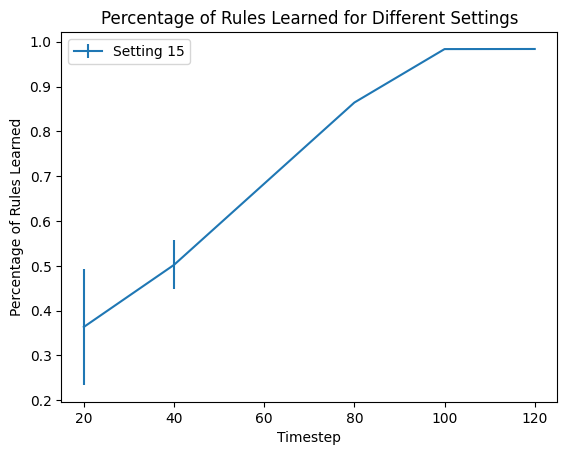

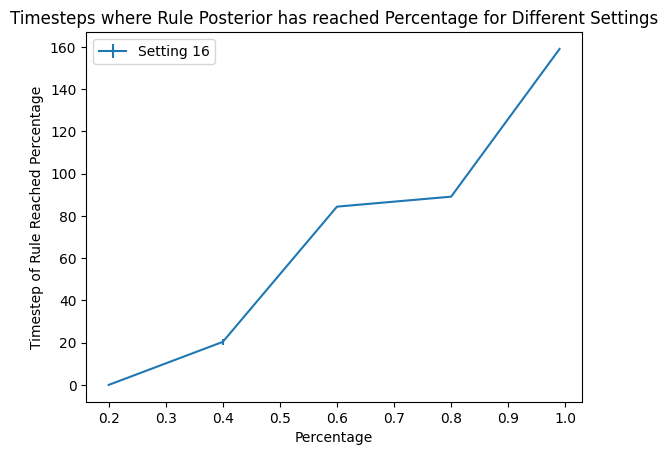

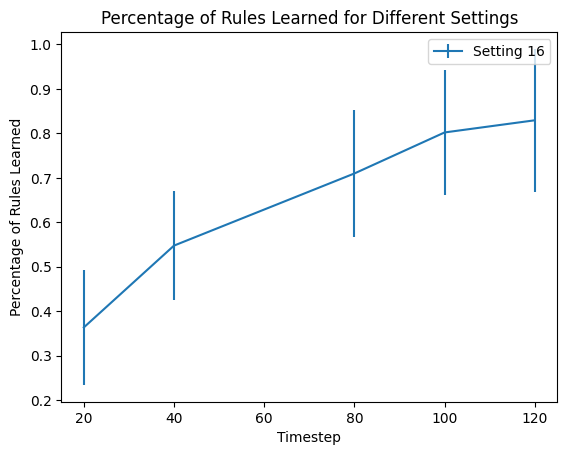

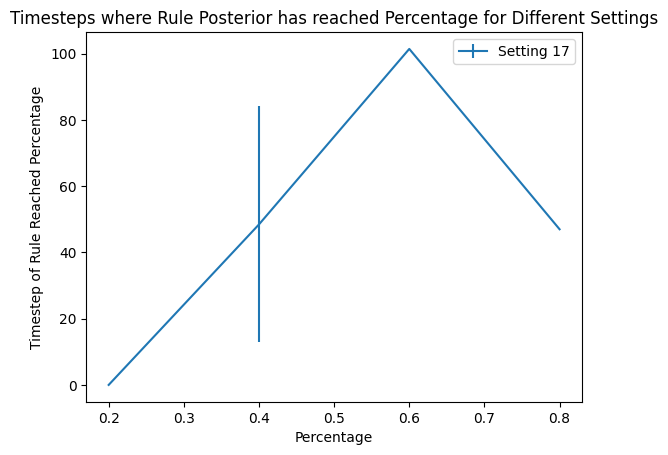

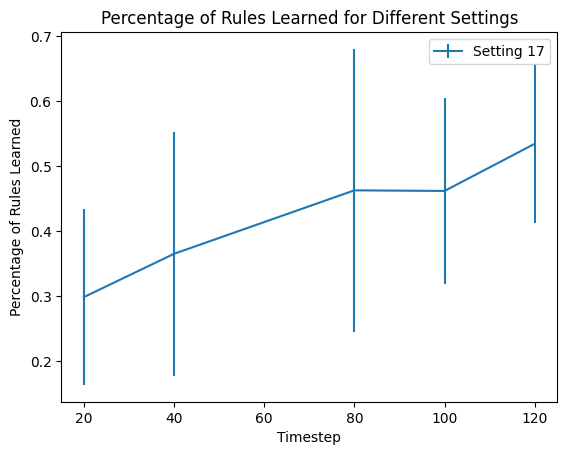

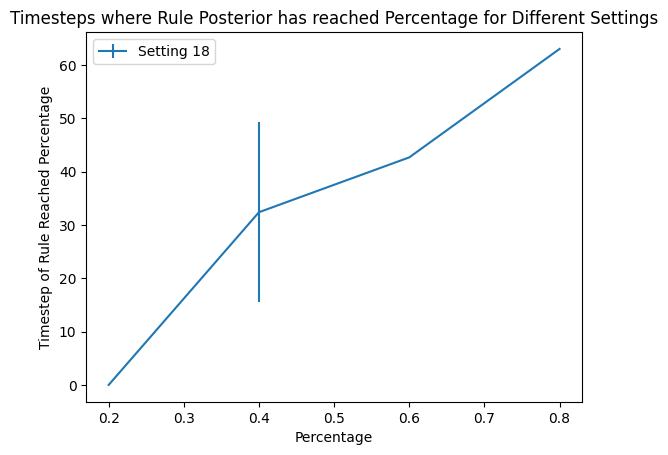

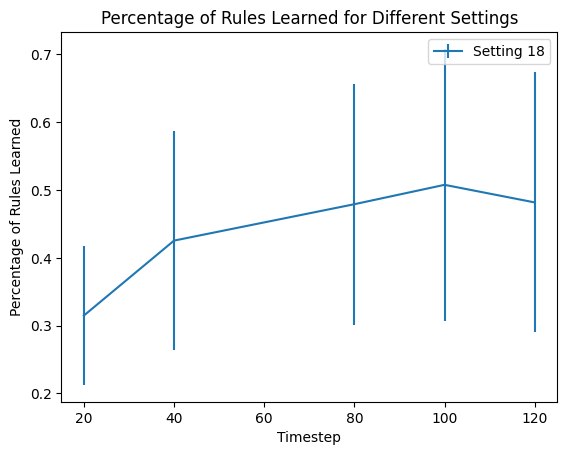

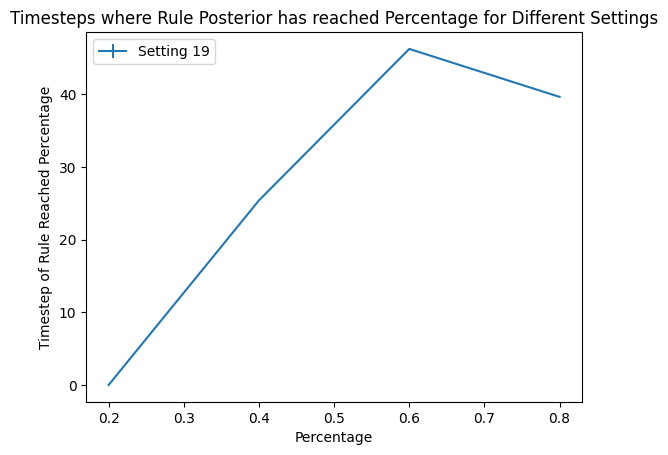

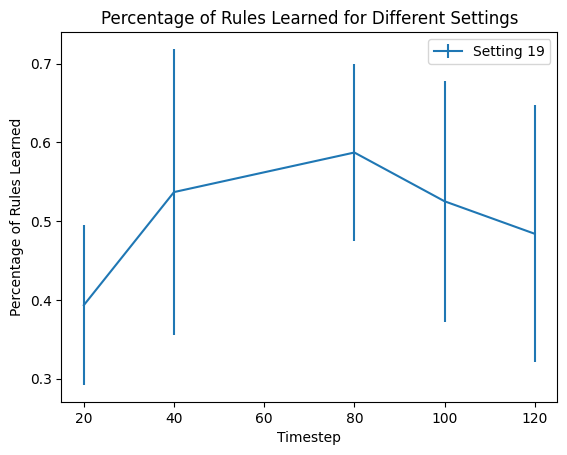

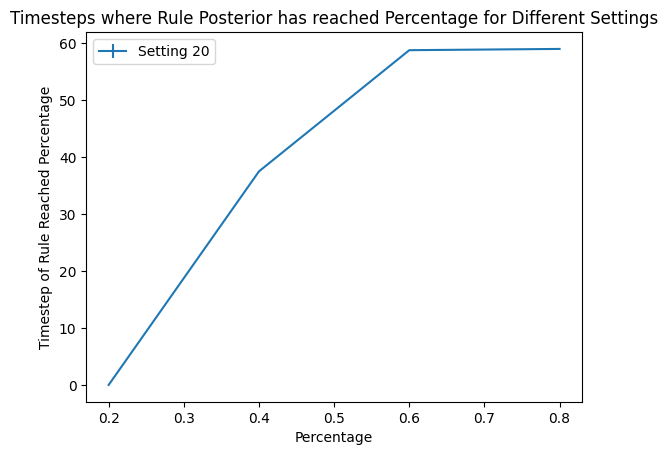

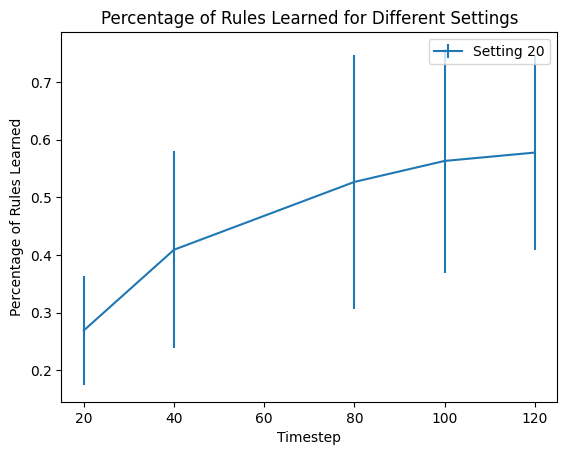

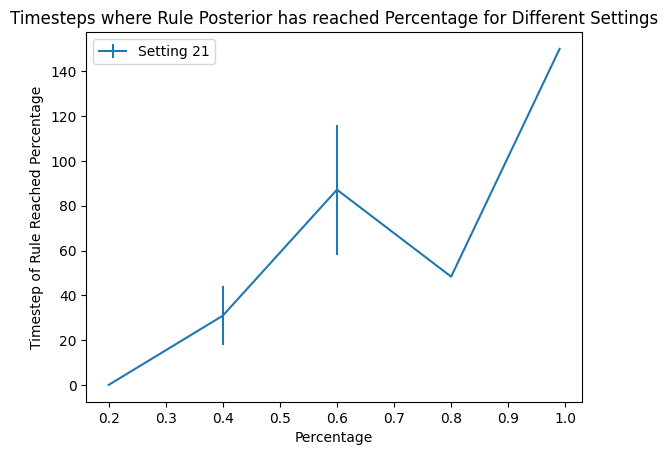

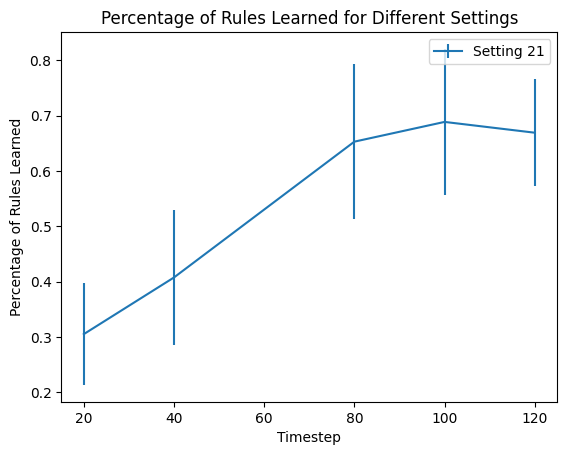

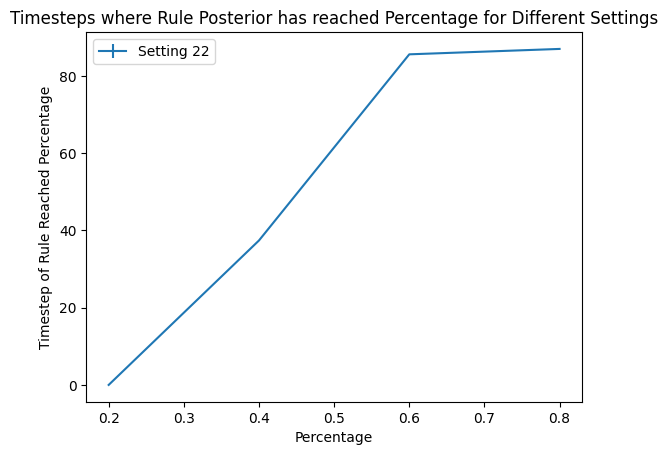

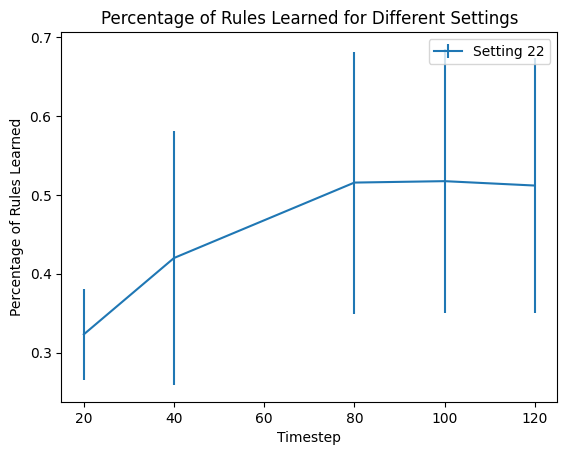

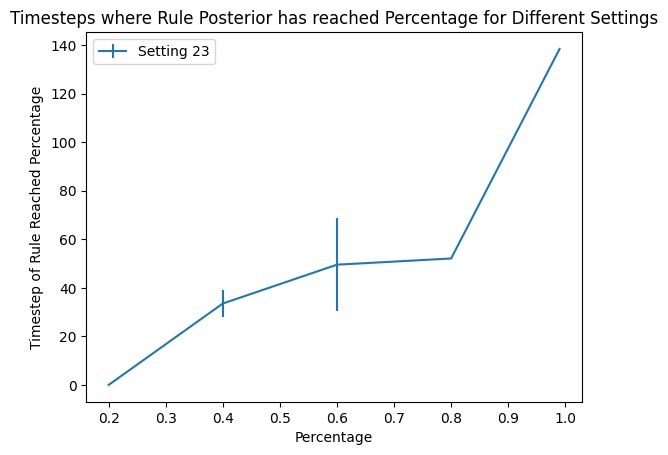

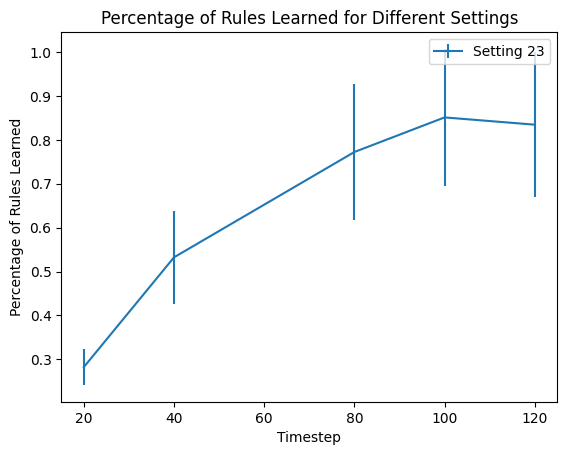

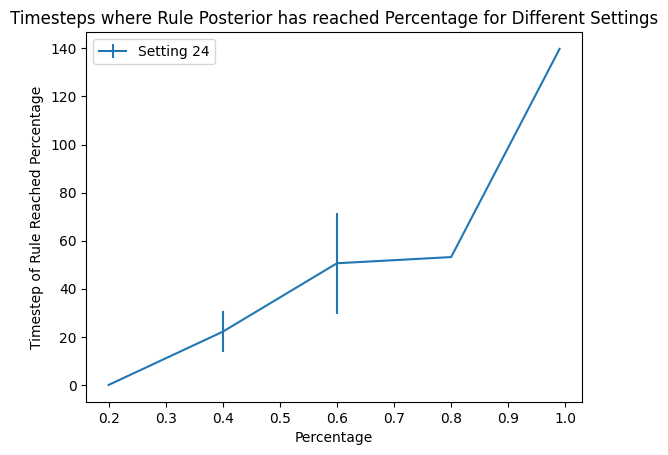

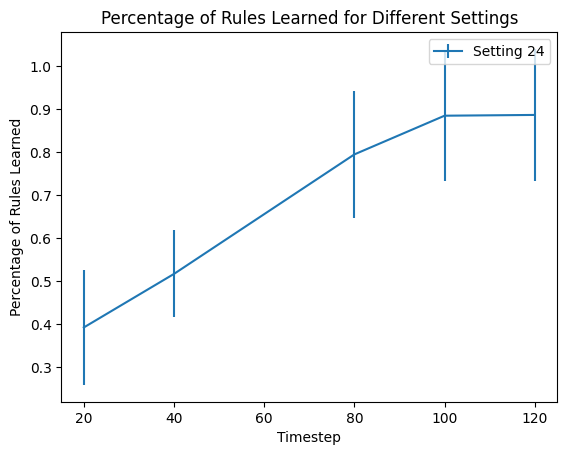

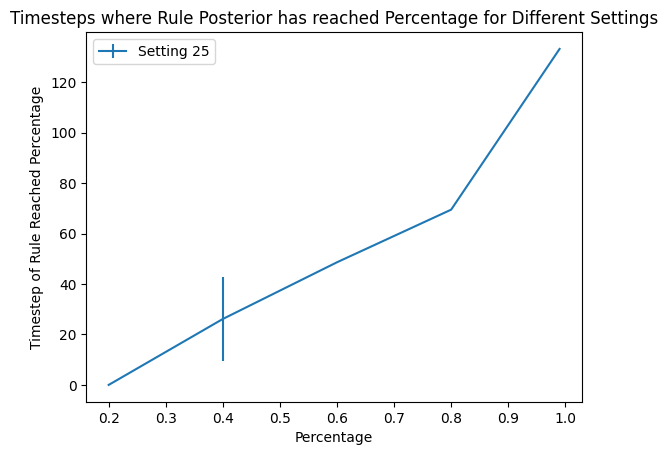

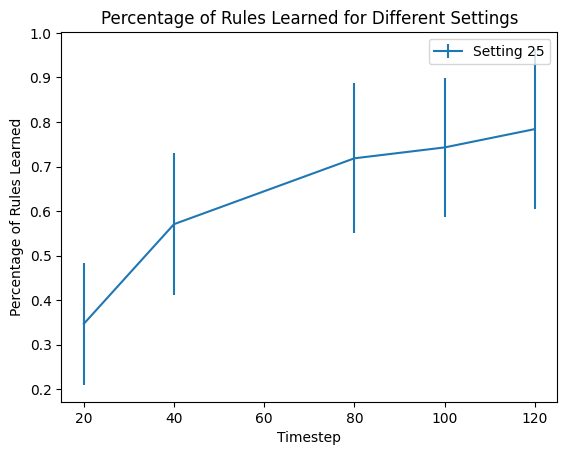

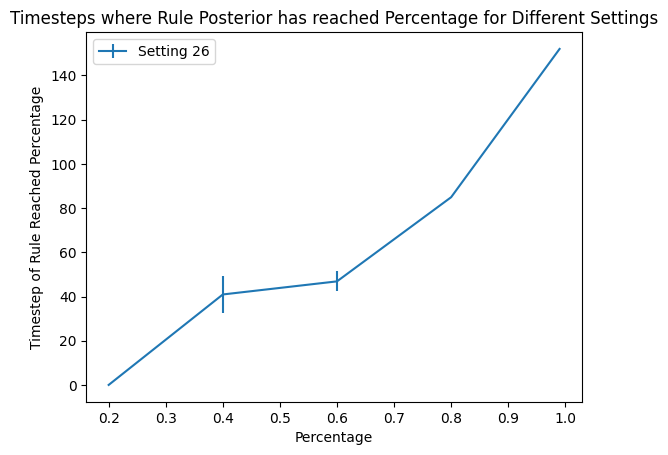

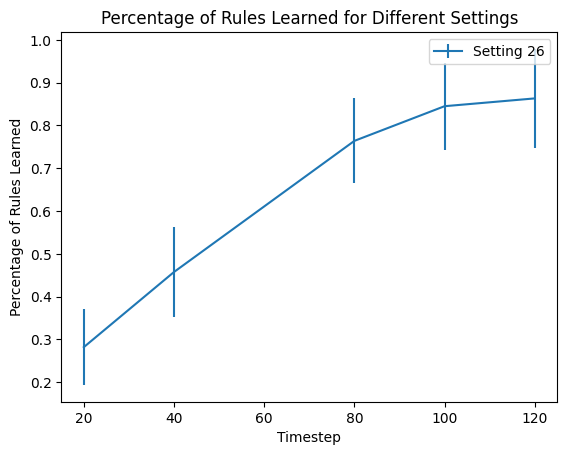

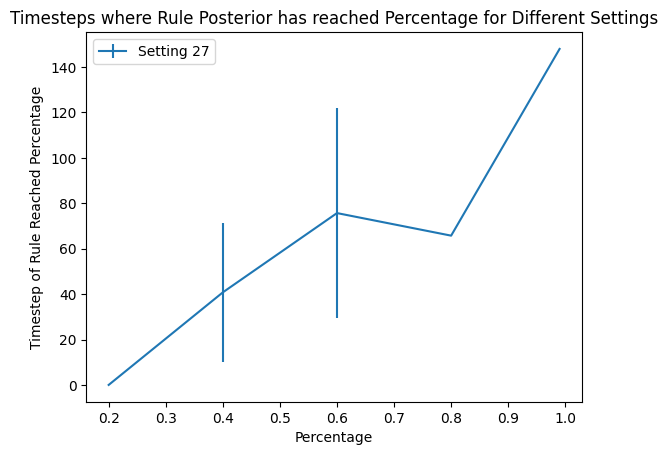

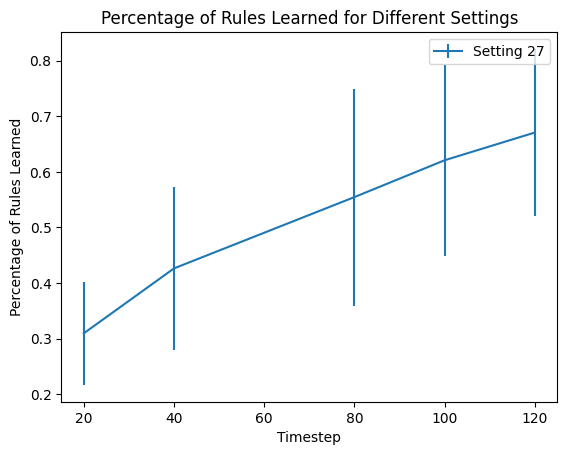

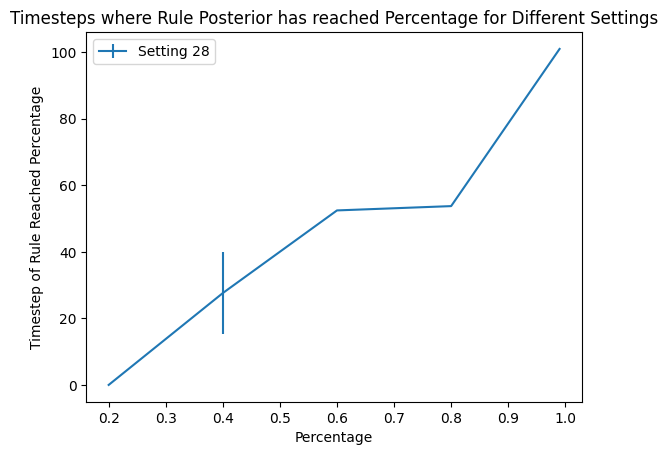

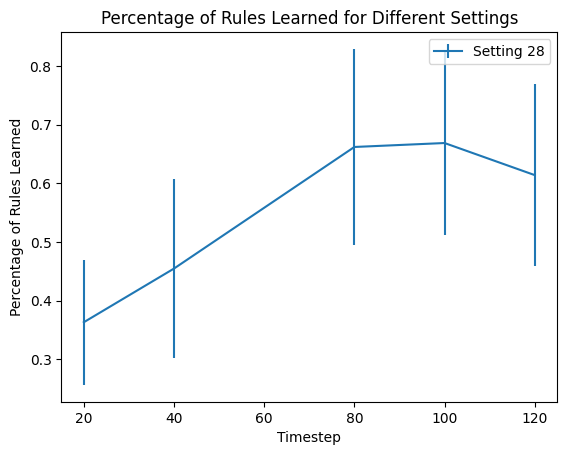

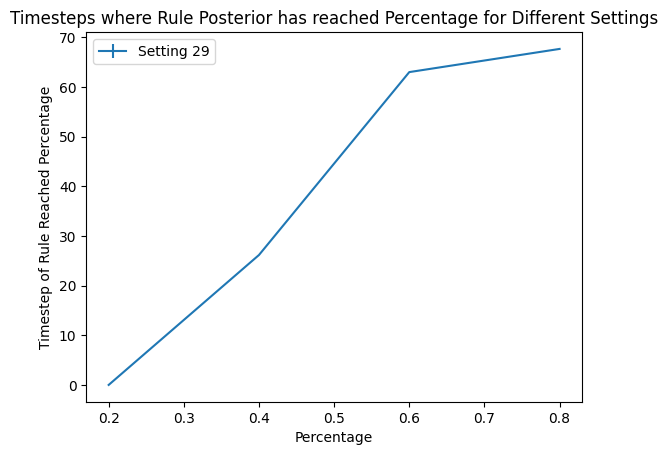

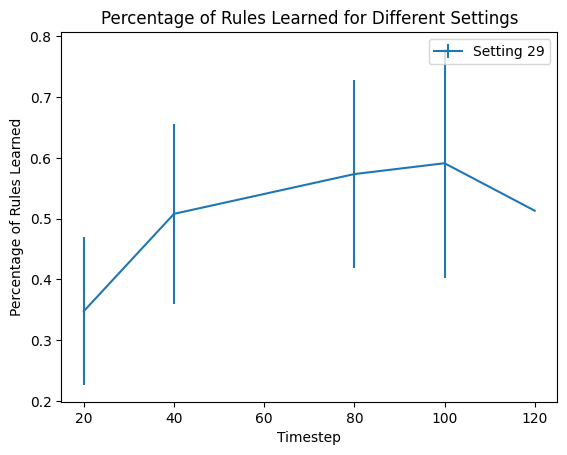

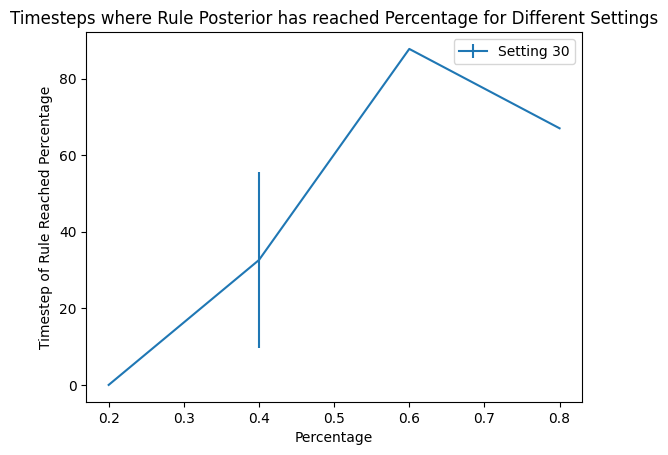

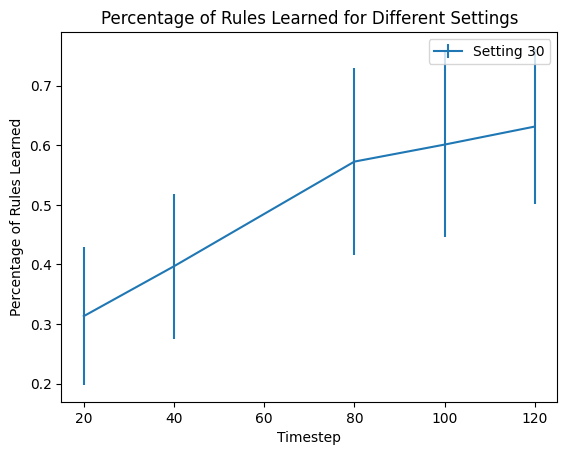

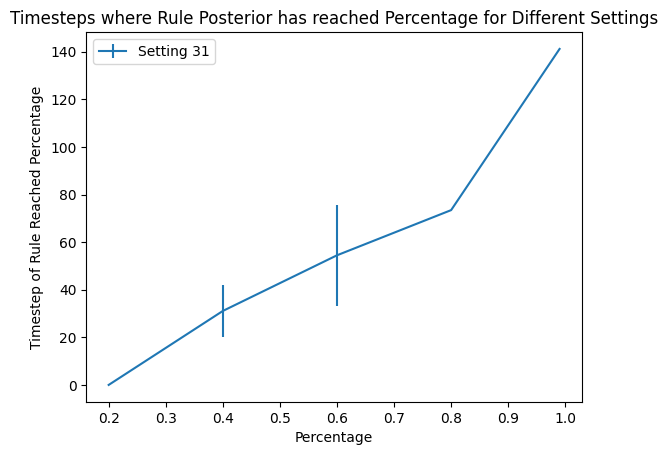

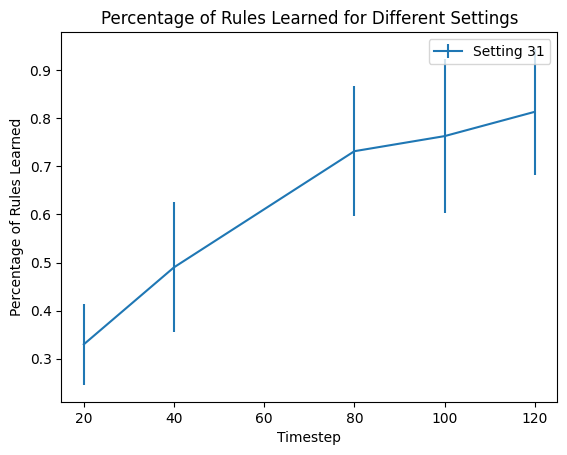

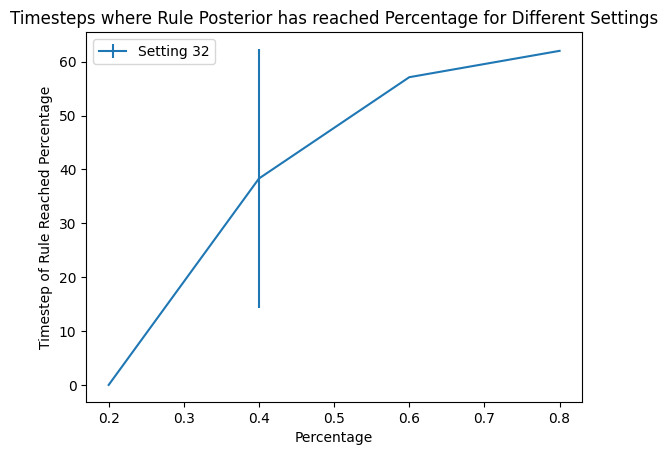

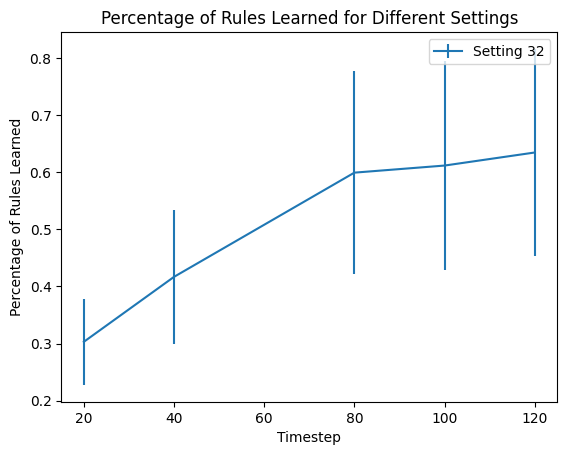

In [216]:
num_settings = 32
num_trials = 13
num_timesteps = 5
target_percentages = [0.2, 0.4, 0.6, 0.8, 0.99]
target_timesteps = [20, 40, 80, 100, 120]
# Step 1: Iterate through each setting and trial
results = []
for i in range(num_settings):
    for j in range(num_trials):
        # Load the corresponding dataframe
        df = rules_dfs[i][j]

        active_rules = [rule for rule in settings_lambda.iloc[i, 3].strip("(").strip(")").split(", ")]
        if "" in active_rules:
            active_rules.remove("")

        # Extract only the active rules from the dataframe
        df_active = df[active_rules]

        # Step 2: Calculate the timesteps where the agent has learned 50%, 80%, and 100% of the rules
        learned = []
        for row in df_active.itertuples():
            if not len(df_active.columns) == 0:
                learned.append(sum(row[1:]) / len(df_active.columns))
            else:
                learned.append(sum(row[1:]))
            """if learned[-1] >= 1.0:
                learned[-1] = 1.0
                break"""

        timesteps = []
        for target in target_percentages:
            flag = False
            for idx, percent in enumerate(learned):
                if percent >= target:
                    timesteps.append(idx)
                    flag = True
                    break
            if flag == False:
                timesteps.append(np.nan)

        # Step 3: Calculate the percentage of rules learned at timesteps 10, 30, and 50
        percentages = []
        for target in target_timesteps:
            if not len(df_active.columns) == 0:
                percentages.append(sum(df_active.iloc[target]) / len(df_active.columns))

            else:
                percentages.append(sum(df_active.iloc[target]))

        # Step 4: Store the results for this setting and trial
        results.append({'setting': i, 'trial': j, 'timesteps': timesteps, 'percentages': percentages})

percentages_all = [[[0 for _ in range(num_timesteps)] for _ in range(num_trials)] for _ in range(num_settings)]
timesteps_all = [[[0 for _ in range(num_timesteps)] for _ in range(num_trials)] for _ in range(num_settings)]

for result in results:
    setting = result['setting']
    trial = result['trial']
    timesteps = result['timesteps']
    percentages = result['percentages']
    
    for i in range(num_timesteps):
        timestep = i
        timesteps_all[setting][trial][timestep] = timesteps[i]
        percentages_all[setting][trial][timestep] = percentages[i]

# Step 2: Iterate over each setting and trial, calculate the mean and standard deviation of the percentages, and plot the results
for setting in range(num_settings):
    setting_timesteps = np.array(timesteps_all[setting])
    mean_timesteps = np.nanmean(setting_timesteps, axis=0)
    std_timesteps = np.std(setting_timesteps, axis=0)

    plt.errorbar(target_percentages, mean_timesteps, yerr=std_timesteps, label=f'Setting {setting+1}')

    plt.legend()
    plt.xlabel('Percentage')
    plt.ylabel('Timestep of Rule Reached Percentage')
    plt.title('Timesteps where Rule Posterior has reached Percentage for Different Settings')
    plt.show()

    setting_percentages = np.array(percentages_all[setting])
    mean_percentages = np.nanmean(setting_percentages, axis=0)
    std_percentages = np.std(setting_percentages, axis=0)

    plt.errorbar(target_timesteps, mean_percentages, yerr=std_percentages, label=f'Setting {setting+1}')

    plt.legend()
    plt.xlabel('Timestep')
    plt.ylabel('Percentage of Rules Learned')
    plt.title('Percentage of Rules Learned for Different Settings')
    plt.show()


## 2. Test on Rule Sets

/var/folders/4v/9klk9mnx3590cr7wzzyykff00000gn/T/ipykernel_63623/893929708.py:74: RuntimeWarning: Mean of empty slice
  mean_timesteps = np.nanmean(setting_timesteps, axis=0)


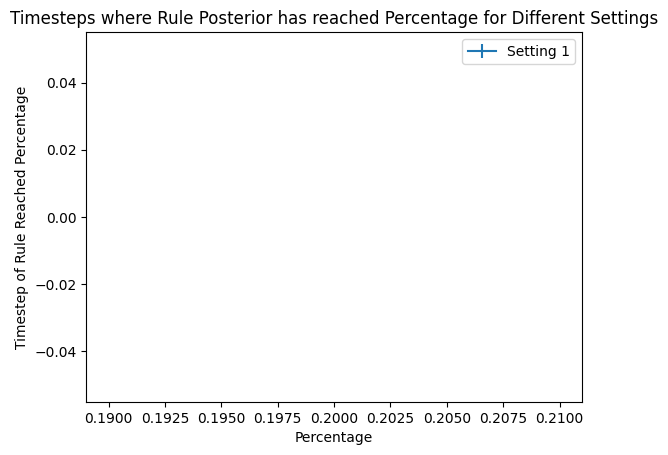

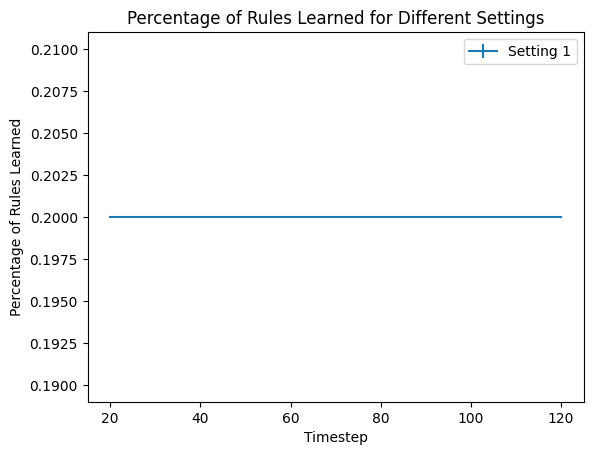

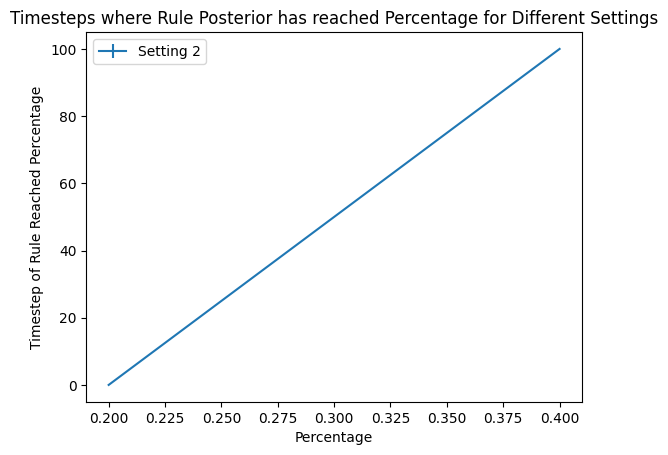

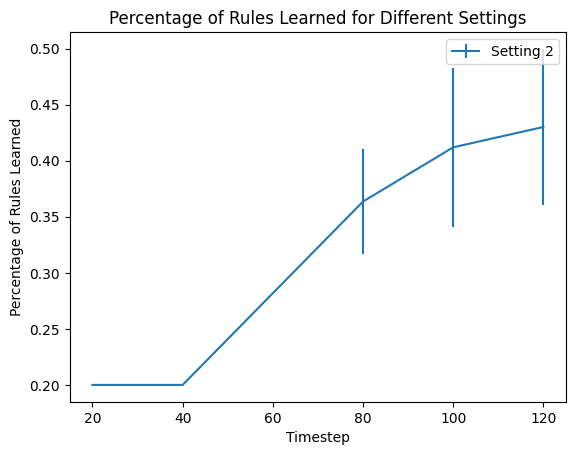

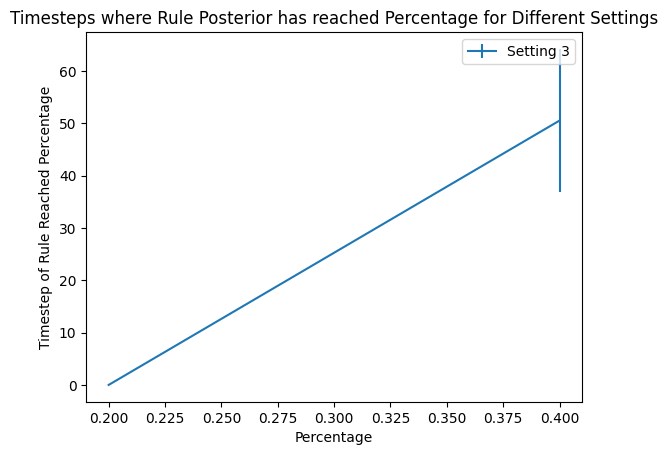

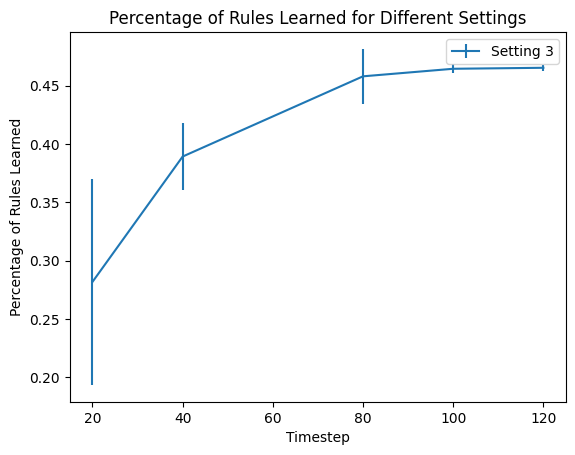

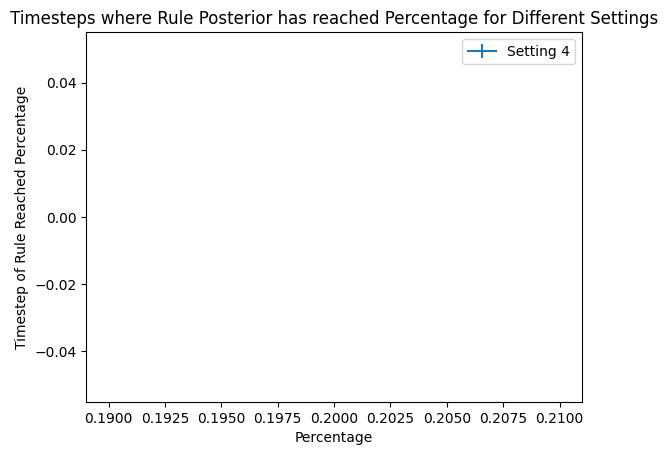

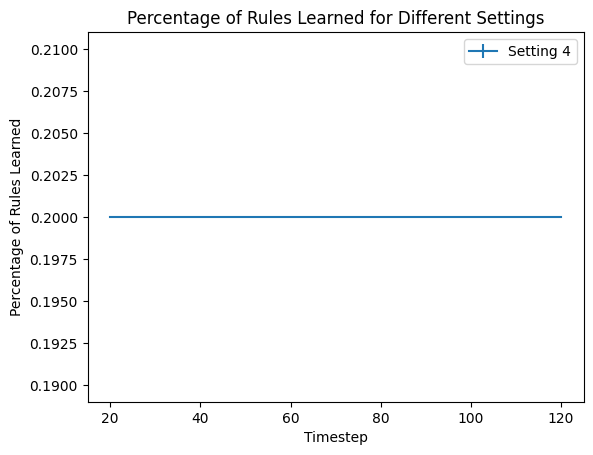

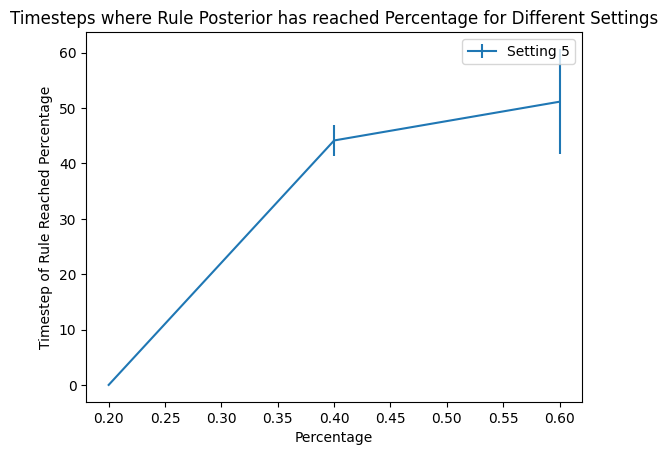

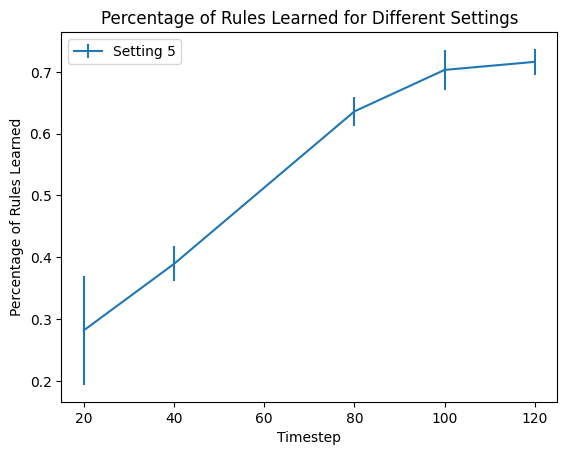

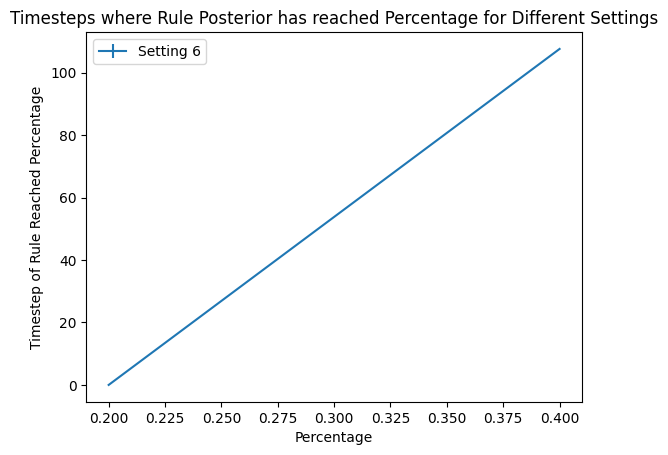

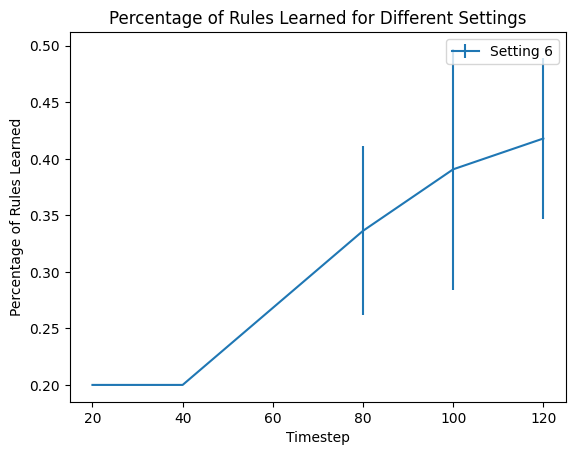

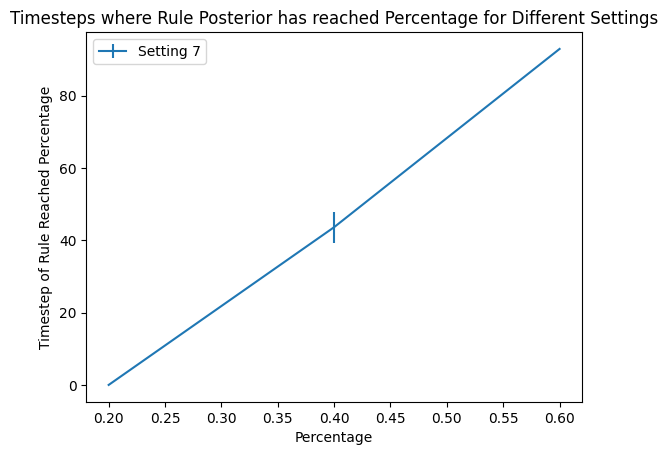

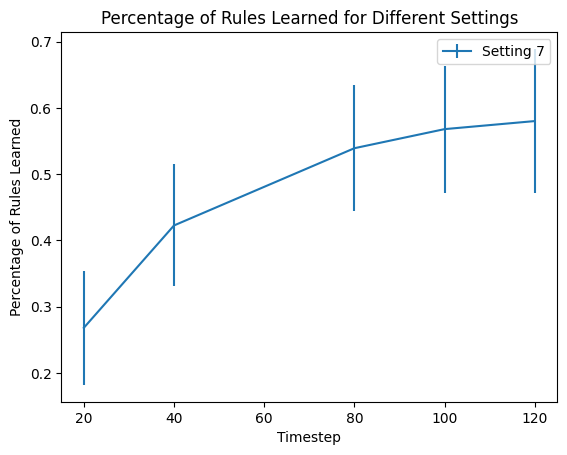

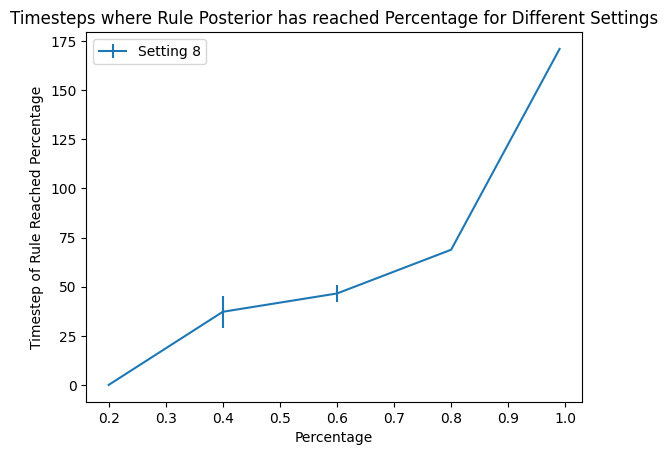

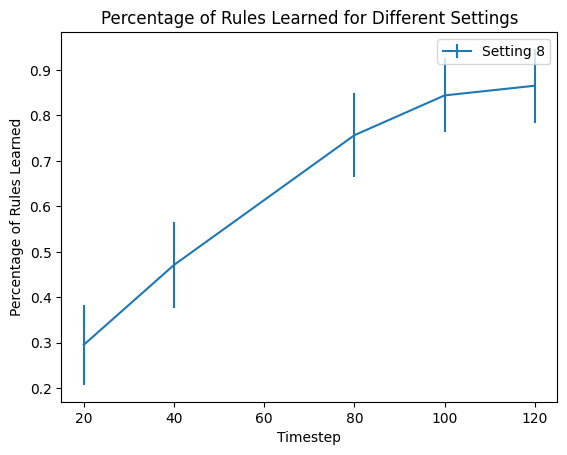

In [211]:
num_settings = 8
num_trials = 13
num_timesteps = 5
target_percentages = [0.2, 0.4, 0.6, 0.8, 0.99]
target_timesteps = [20, 40, 80, 100, 120]
active_rules = [
    #"obs['NUM_APPLES_AROUND'] < 2 and obs['CUR_CELL_HAS_APPLE'] -> !MOVE_ACTION", 
    #"obs['CUR_CELL_HAS_APPLE'] and not obs['AGENT_HAS_STOLEN'] -> !MOVE_ACTION",
    "obs['SINCE_AGENT_LAST_CLEANED'] > 30 -> obs['SINCE_AGENT_LAST_CLEANED'] < 30", 
    "obs['SINCE_AGENT_LAST_PAYED'] > 15 -> obs['SINCE_AGENT_LAST_PAYED'] < 15",
    "obs['SINCE_AGENT_LAST_CLEANED'] > 5 -> obs['SINCE_AGENT_LAST_CLEANED'] < 5"
    ]
# Step 1: Iterate through each setting and trial
results = []
for i in range(num_settings):
    for j in range(num_trials):
        # Load the corresponding dataframe
        df = test_dfs[i][j]

        # Extract only the active rules from the dataframe
        df_active = df[active_rules]

        # Step 2: Calculate the timesteps where the agent has learned 50%, 80%, and 100% of the rules
        learned = []
        for row in df_active.itertuples():
            if not len(df_active.columns) == 0:
                learned.append(sum(row[1:]) / len(df_active.columns))
            else:
                learned.append(sum(row[1:]))
            """if learned[-1] >= 1.0:
                learned[-1] = 1.0
                break"""

        timesteps = []
        for target in target_percentages:
            flag = False
            for idx, percent in enumerate(learned):
                if percent >= target:
                    timesteps.append(idx)
                    flag = True
                    break
            if flag == False:
                timesteps.append(np.nan)

        # Step 3: Calculate the percentage of rules learned at timesteps 10, 30, and 50
        percentages = []
        for target in target_timesteps:
            if not len(df_active.columns) == 0:
                percentages.append(sum(df_active.iloc[target]) / len(df_active.columns))

            else:
                percentages.append(sum(df_active.iloc[target]))

        # Step 4: Store the results for this setting and trial
        results.append({'setting': i, 'trial': j, 'timesteps': timesteps, 'percentages': percentages})

percentages_all = [[[0 for _ in range(num_timesteps)] for _ in range(num_trials)] for _ in range(num_settings)]
timesteps_all = [[[0 for _ in range(num_timesteps)] for _ in range(num_trials)] for _ in range(num_settings)]

for result in results:
    setting = result['setting']
    trial = result['trial']
    timesteps = result['timesteps']
    percentages = result['percentages']
    
    for i in range(num_timesteps):
        timestep = i
        timesteps_all[setting][trial][timestep] = timesteps[i]
        percentages_all[setting][trial][timestep] = percentages[i]

# Step 2: Iterate over each setting and trial, calculate the mean and standard deviation of the percentages, and plot the results
for setting in range(num_settings):
    setting_timesteps = np.array(timesteps_all[setting])
    mean_timesteps = np.nanmean(setting_timesteps, axis=0)
    std_timesteps = np.std(setting_timesteps, axis=0)

    plt.errorbar(target_percentages, mean_timesteps, yerr=std_timesteps, label=f'Setting {setting+1}')

    plt.legend()
    plt.xlabel('Percentage')
    plt.ylabel('Timestep of Rule Reached Percentage')
    plt.title('Timesteps where Rule Posterior has reached Percentage for Different Settings')
    plt.show()

    setting_percentages = np.array(percentages_all[setting])
    mean_percentages = np.nanmean(setting_percentages, axis=0)
    std_percentages = np.std(setting_percentages, axis=0)

    plt.errorbar(target_timesteps, mean_percentages, yerr=std_percentages, label=f'Setting {setting+1}')

    plt.legend()
    plt.xlabel('Timestep')
    plt.ylabel('Percentage of Rules Learned')
    plt.title('Percentage of Rules Learned for Different Settings')
    plt.show()
